# Conceptual

## #3

Sources: https://www.geeksforgeeks.org/plot-mathematical-expressions-in-python-using-matplotlib/ 

### Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Define Variables and Functions

In [84]:
x = np.linspace(-2, 2, 100)
e = np.random.normal(0, 1, 100)
b1 = x
b2 = (x-1)**2*np.where(x >= 1, 1, 0)
B0 = 1
B1 = 1
B2 = -2

y = B2+B1*b1+B2*b2+e
Y = B2+B1*b1+B2*b2

Points = {'X': x, 'Y': Y}
Points = pd.DataFrame(Points)
Points

X         Y
0  -2.000000 -4.000000
1  -1.959596 -3.959596
2  -1.919192 -3.919192
3  -1.878788 -3.878788
4  -1.838384 -3.838384
..       ...       ...
95  1.838384 -1.567391
96  1.878788 -1.665748
97  1.919192 -1.770636
98  1.959596 -1.882053
99  2.000000 -2.000000

[100 rows x 2 columns]

### Intercept and Maximun

In [85]:
b1 = x0 = 0
b2 = (x0-1)**2*np.where(x0 >= 1, 1, 0)
Y_int = B2+B1*b1+B2*b2
print('y intercept is: ', Y_int)
Max = Points['Y'].max()
Max_at = Points[Points['Y']== Max]
print('Max ', Max, ' at x = ', Max_at.iloc[0]['X'])

y intercept is:  -2
Max  -0.8756249362309968  at x =  1.2323232323232327


### Plot  
Source: https://www.geeksforgeeks.org/plot-mathematical-expressions-in-python-using-matplotlib/ 

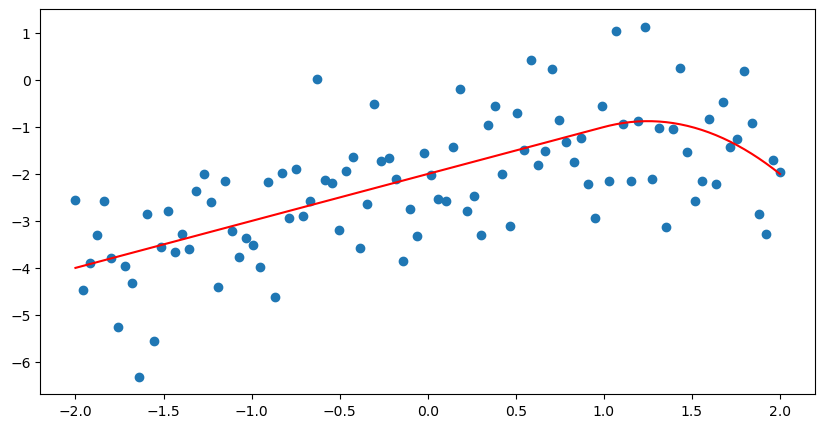

In [86]:
fig = plt.figure(figsize = (10, 5))

plt.scatter(x, y)
plt.plot(x, Y, color = 'red')
plt.show()

# Applied  
## #8  
### Packages

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from ISLP.models import (summarize,
                         poly,
                         ModelSpec as MS)
import statsmodels.api as sm
from ISLP import load_data

### Import Data

In [6]:
Auto = load_data('Auto')
Index = Auto.columns
Index

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

### Plots
Source: https://www.w3schools.com/python/python_lists_remove.asp  
https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/

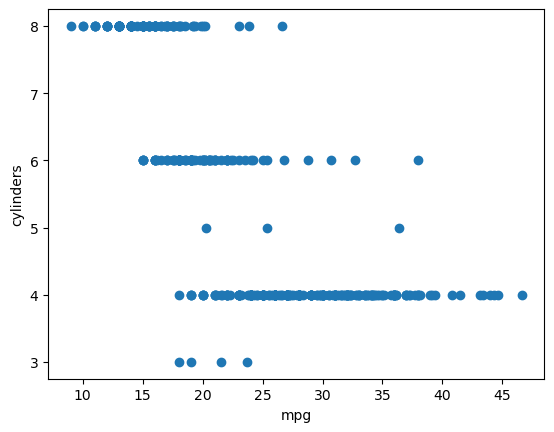

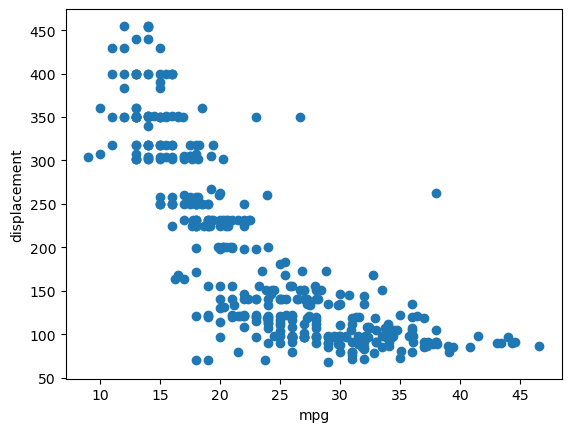

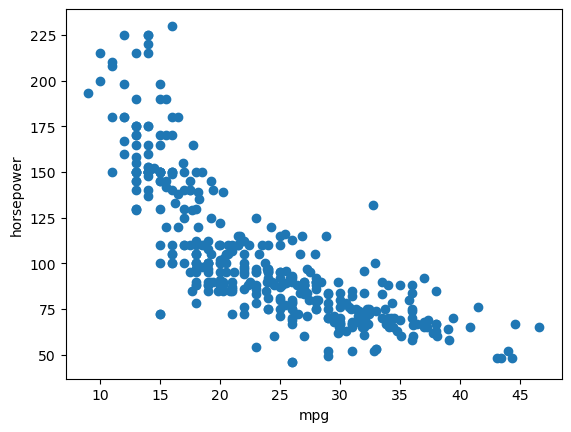

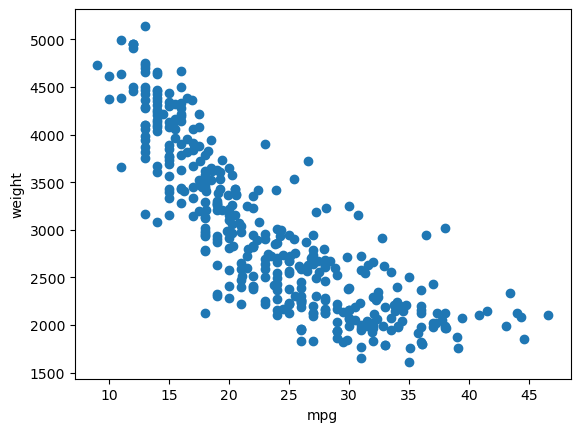

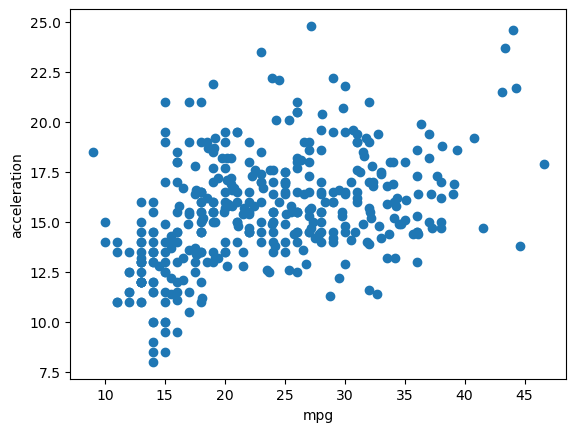

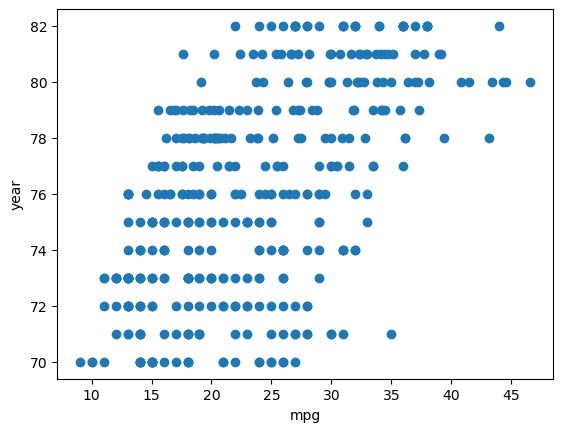

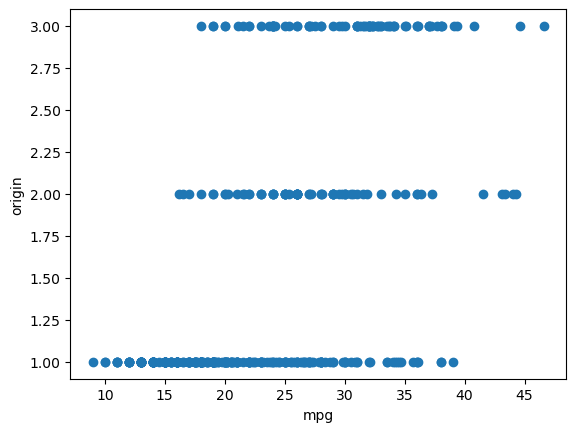

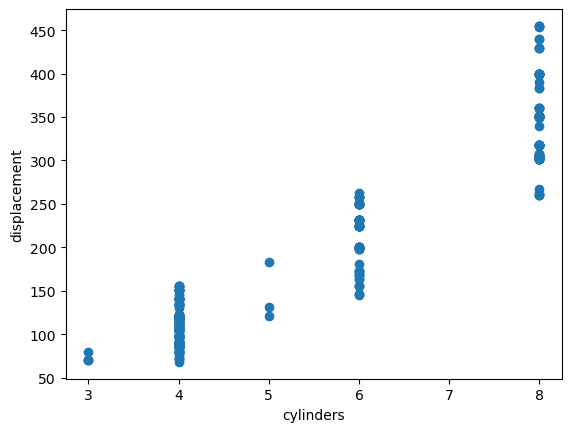

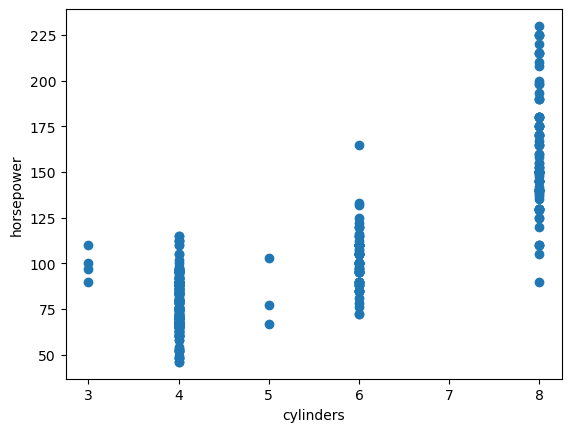

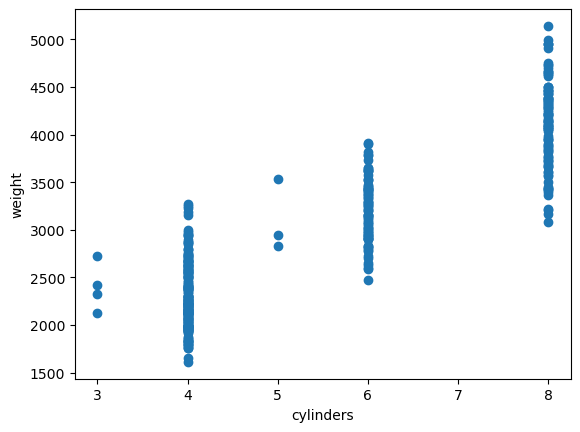

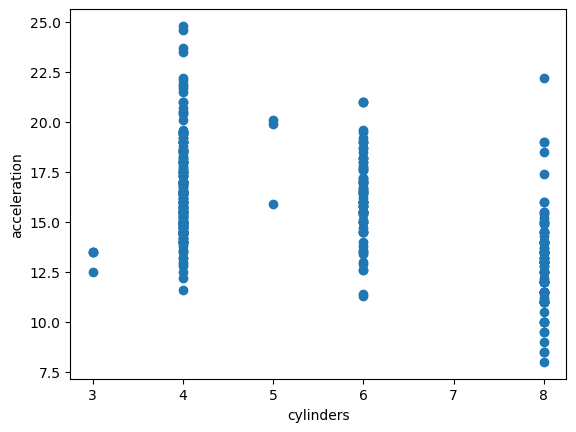

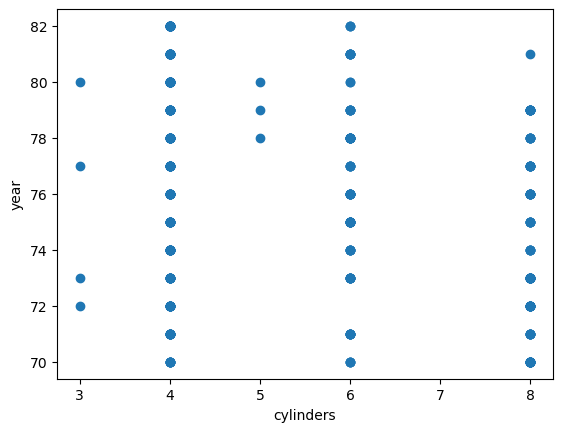

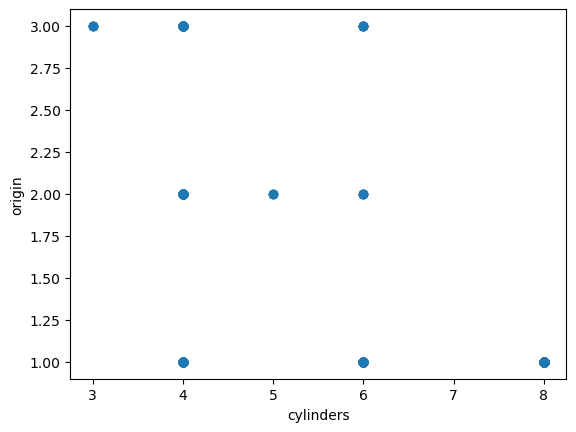

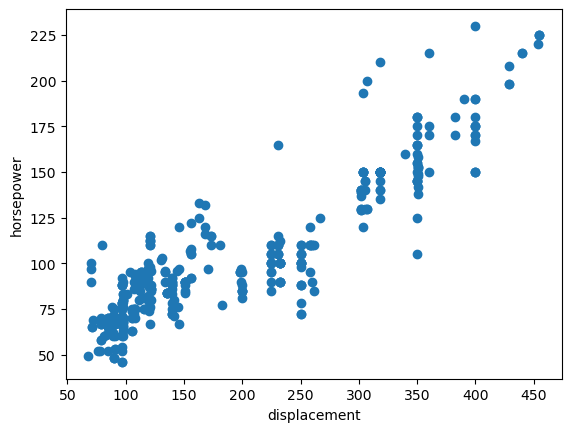

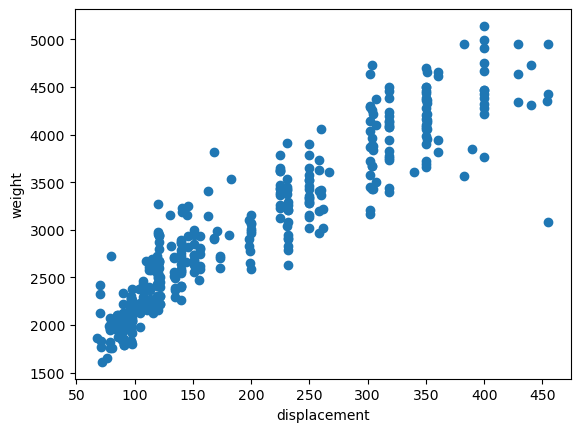

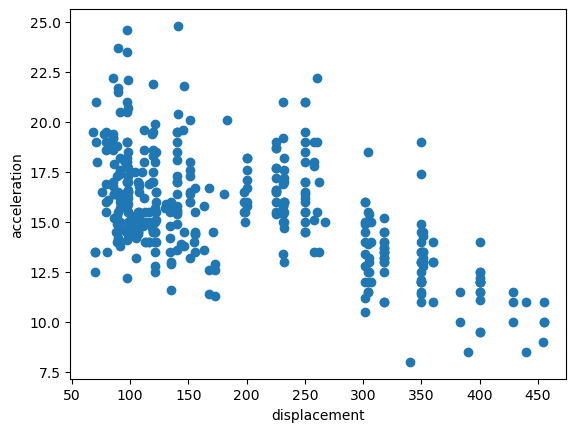

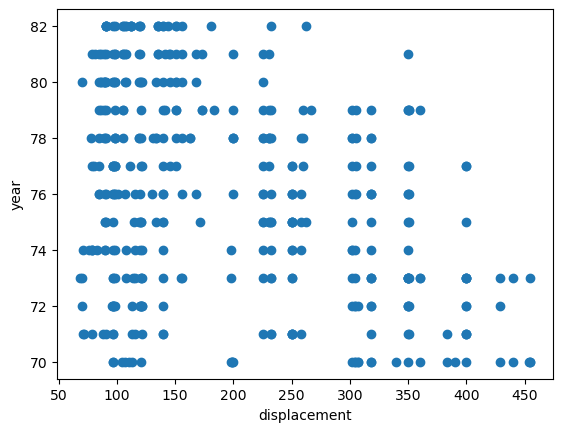

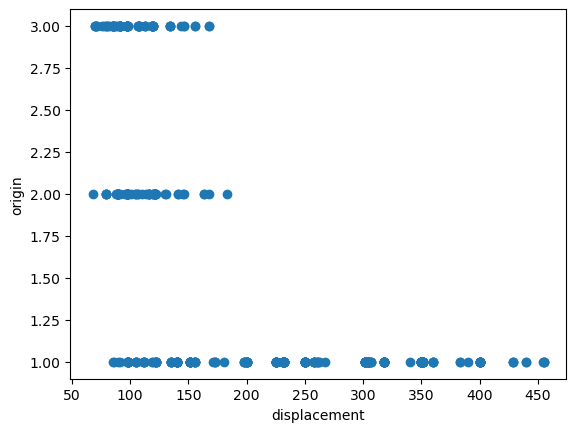

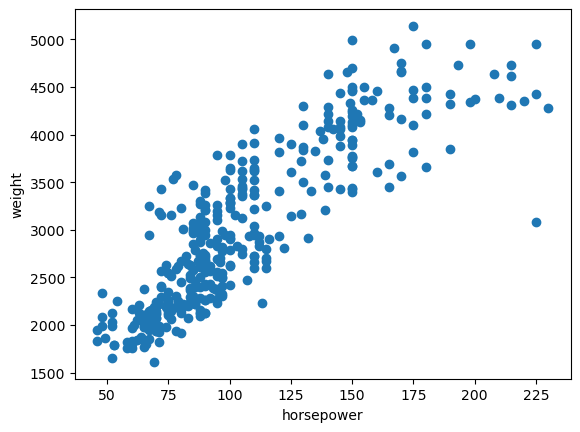

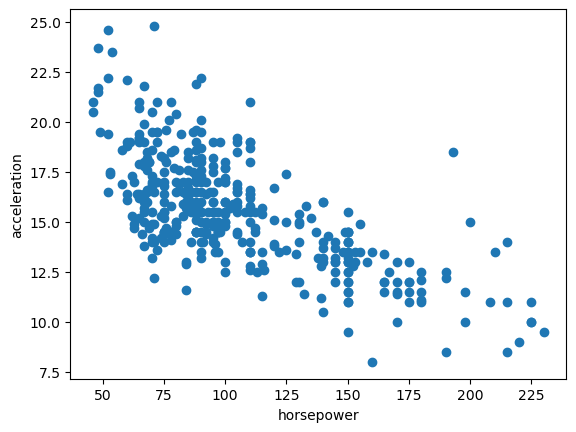

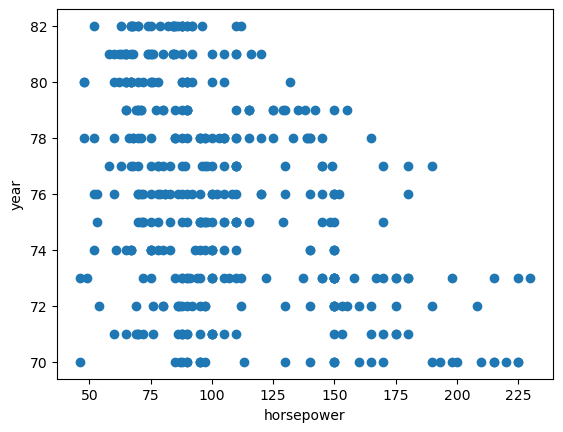

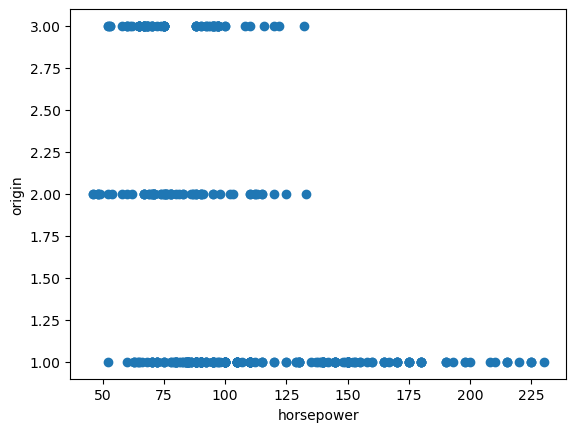

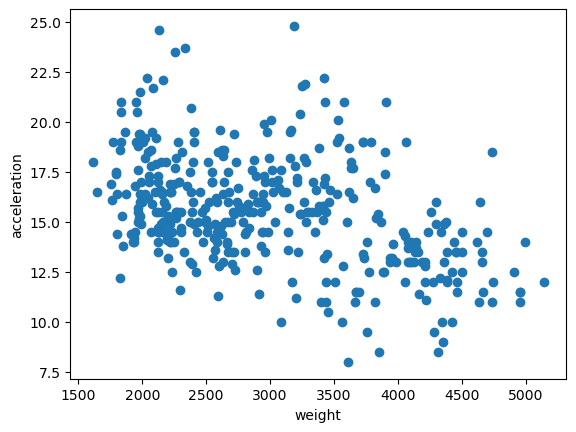

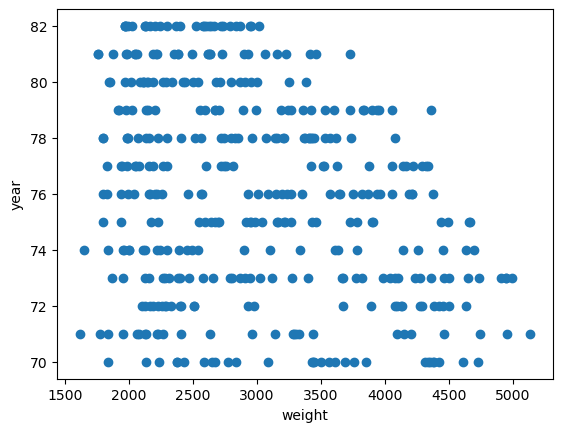

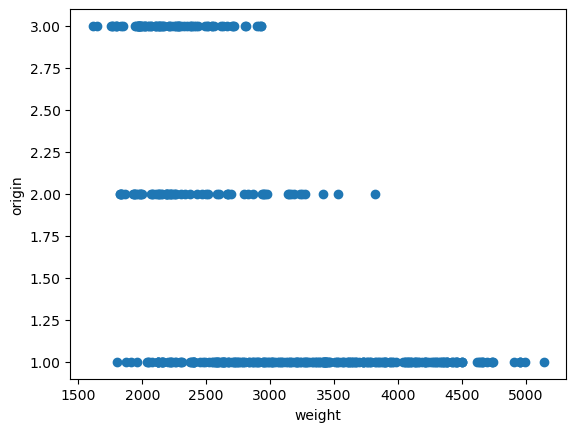

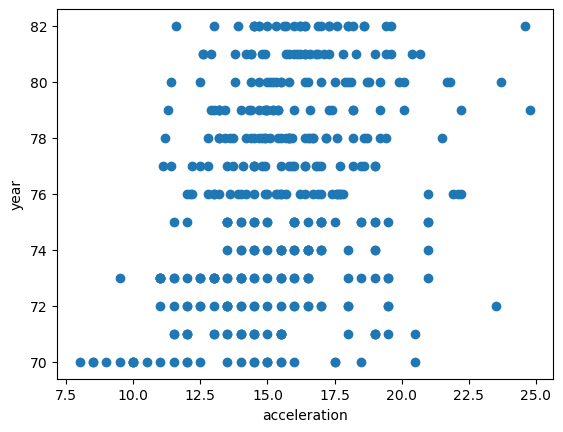

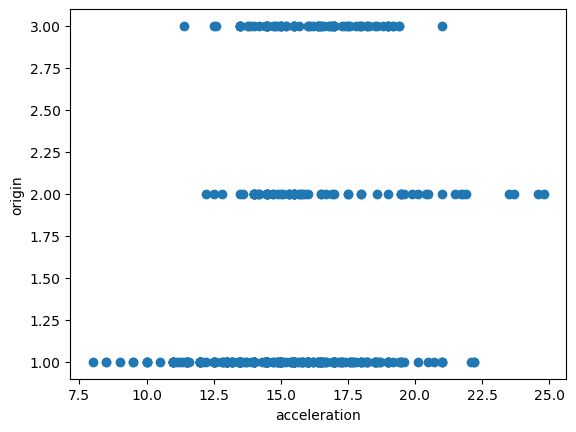

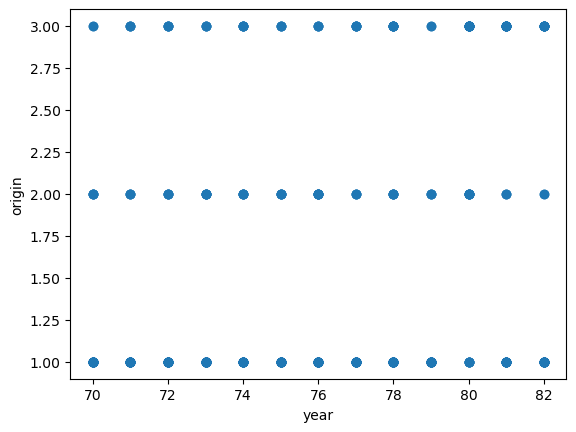

In [7]:
Index2 = list(Index)
for X in Index:
    Index2.remove(X)
    for Y in Index2:
        plt.scatter(Auto[X], Auto[Y])
        plt.xlabel(X)
        plt.ylabel(Y)
        plt.show()


### MPG by Horsepower

In [8]:
y = Auto['horsepower']
poly_hp = MS([poly('mpg', degree=3)]).fit(Auto)
#print(poly_hp)
model = sm.OLS(y, poly_hp.transform(Auto))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             horsepower   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     368.6
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          3.59e-113
Time:                        21:39:40   Log-Likelihood:                -1722.5
No. Observations:                 392   AIC:                             3453.
Df Residuals:                     388   BIC:                             3469.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                104.4694      0.995    105.032      0.000     102.514     106.425
poly(mpg, degree=3)[0]  -592.4711     19.693    -30.086      0.000    -631.189    -553.753
poly(mpg, degree=3)[1]   254.7374     19.693     12.936      0.000     216.019     293.455
poly(mpg, degree=3)[2]  -113.6241     19.693     -5.770      0.000    -152.342     -74.906
==============================================================================
Omnibus:                       57.075   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.273
Skew:                           0.664   Prob(JB):                     2.88e-37
Kurtosis:                       5.922   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

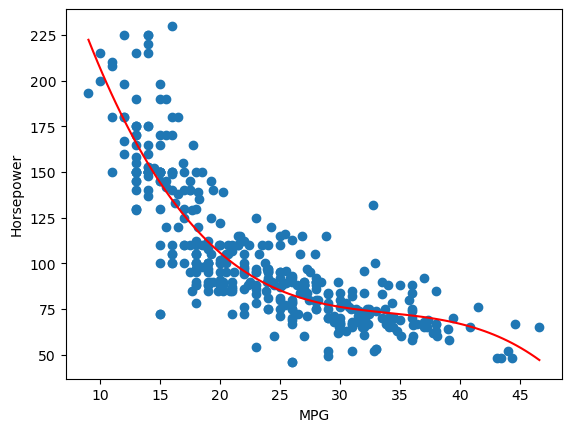

In [9]:
plt.scatter(Auto['mpg'], Auto['horsepower'])

x = np.linspace(Auto['mpg'].min(), Auto['mpg'].max(), 100)
x_df = pd.DataFrame({'mpg': x})
Xnew = poly_hp.transform(x_df)

plt.plot(x, results.predict(Xnew), color='red') 
plt.xlabel("MPG")
plt.ylabel("Horsepower")
plt.show()

### Acceleration by Displacement

In [10]:
y = Auto['acceleration']
poly_disp = MS([poly('displacement', degree=7)]).fit(Auto)
#print(poly_hp)
X = poly_disp.transform(Auto)
model = sm.OLS(y, X)
results = model.fit()
print("MSE: ", results.mse_resid)
print(results.summary())


MSE:  4.7189980205074145
                            OLS Regression Results                            
Dep. Variable:           acceleration   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     35.24
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           6.58e-38
Time:                        21:39:40   Log-Likelihood:                -856.30
No. Observations:                 392   AIC:                             1729.
Df Residuals:                     384   BIC:                             1760.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

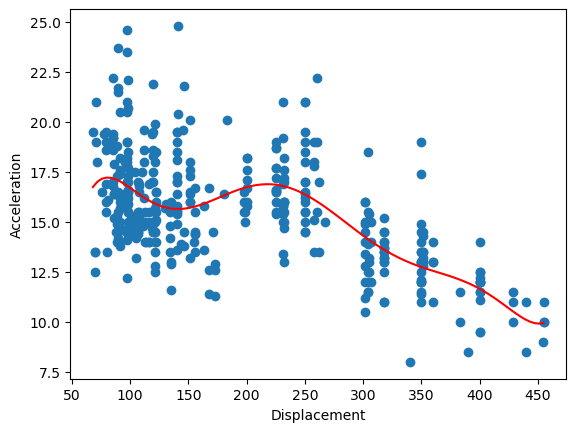

In [11]:
plt.scatter(Auto['displacement'], Auto['acceleration'])

x = np.linspace(Auto['displacement'].min(), Auto['displacement'].max(), 100)
x_df = pd.DataFrame({'displacement': x})
Xnew = poly_disp.transform(x_df)
pred_y = results.predict(Xnew)

plt.plot(x, pred_y, color='red') 
plt.xlabel("Displacement")
plt.ylabel("Acceleration")
plt.show()


#### Drop Insignificant Variables

In [12]:
y = Auto['acceleration']
poly_disp = MS([poly('displacement', degree=7)]).fit(Auto)
#print(poly_hp)
X = poly_disp.transform(Auto)
X.drop(['poly(displacement, degree=7)[2]', 'poly(displacement, degree=7)[4]'],axis=1, inplace=True)
model = sm.OLS(y, X)
results = model.fit()
print("MSE: ", results.mse_resid)
print(results.summary())


MSE:  4.738058620135715
                            OLS Regression Results                            
Dep. Variable:           acceleration   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     48.42
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           7.65e-39
Time:                        21:39:40   Log-Likelihood:                -858.10
No. Observations:                 392   AIC:                             1728.
Df Residuals:                     386   BIC:                             1752.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

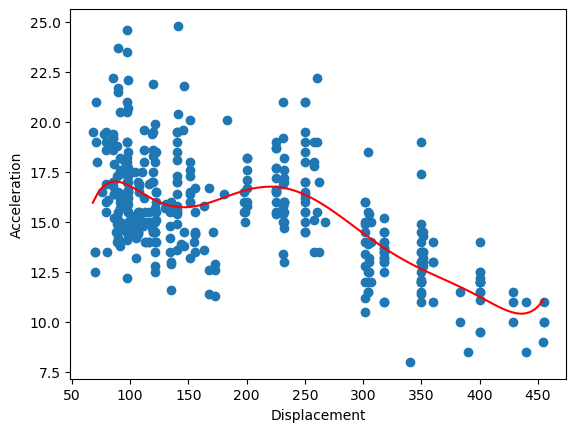

In [13]:
plt.scatter(Auto['displacement'], Auto['acceleration'])

x = np.linspace(Auto['displacement'].min(), Auto['displacement'].max(), 100)
x_df = pd.DataFrame({'displacement': x})
Xnew = poly_disp.transform(x_df)
Xnew.drop(['poly(displacement, degree=7)[2]', 'poly(displacement, degree=7)[4]'],axis=1, inplace=True)
pred_y = results.predict(Xnew)

plt.plot(x, pred_y, color='red') 
plt.xlabel("Displacement")
plt.ylabel("Acceleration")
plt.show()


# Abalone Dataset Competition

### Packages

In [14]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from functools import partial
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import random
random.seed(0)


## Data Import

In [15]:
abalone = pd.read_csv('train.csv')
abalone = pd.get_dummies(abalone, columns=['Sex'], drop_first = False)

Index = list(abalone.columns)
Index

['id',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Whole weight.1',
 'Whole weight.2',
 'Shell weight',
 'Rings',
 'Sex_F',
 'Sex_I',
 'Sex_M']

## Data Visualization

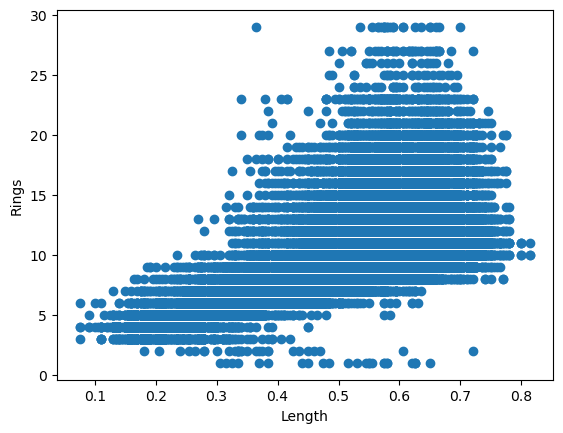

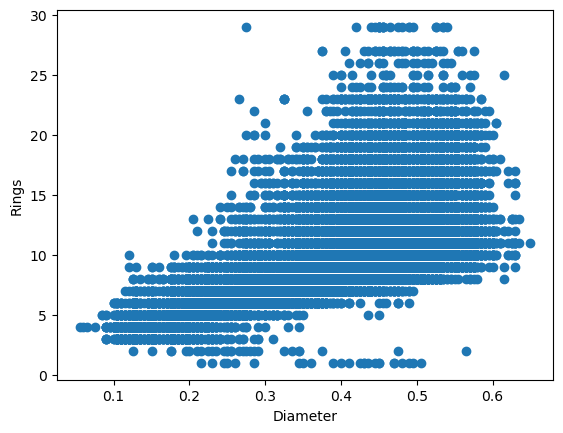

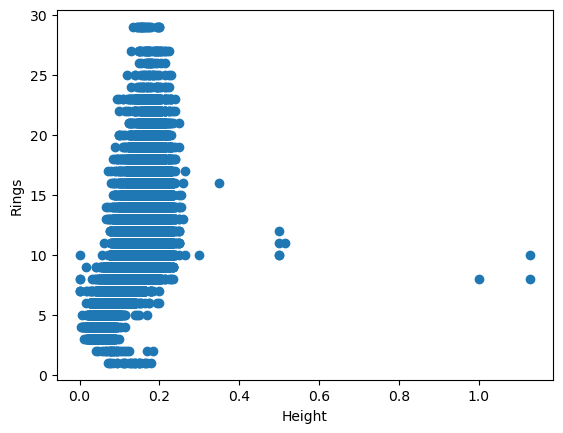

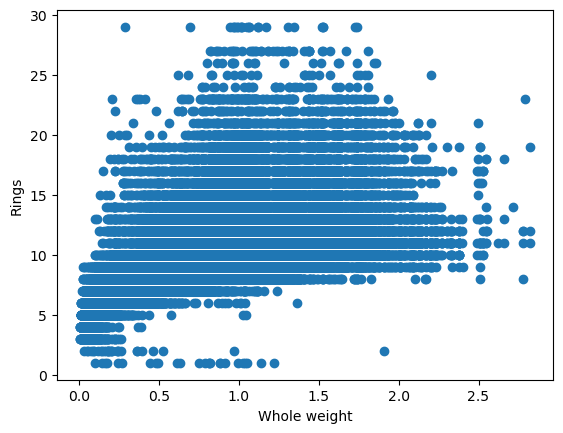

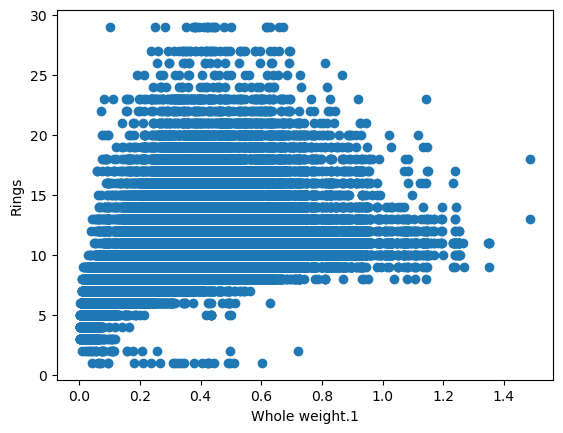

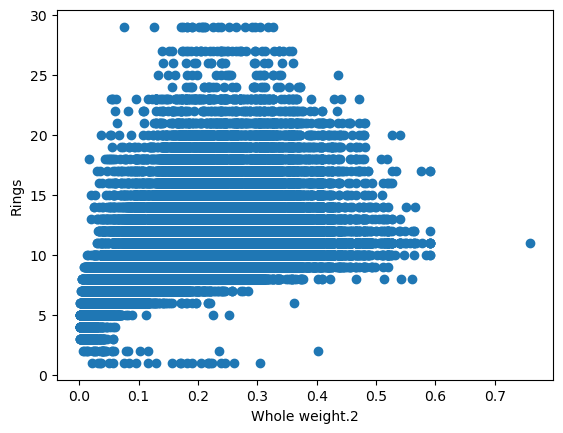

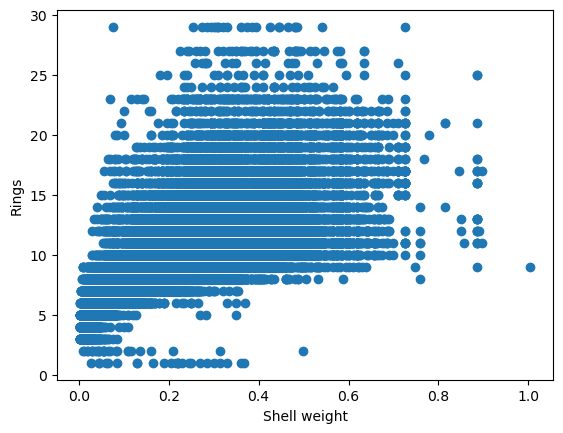

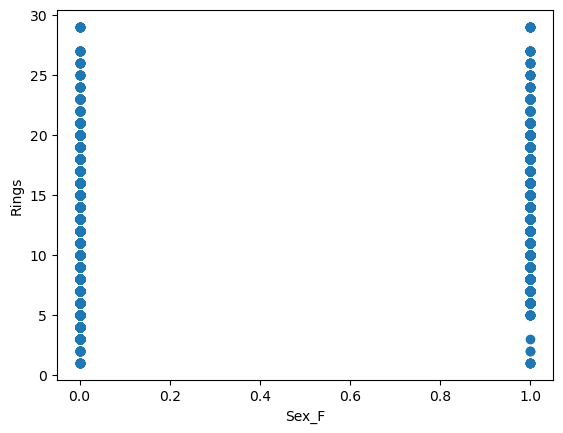

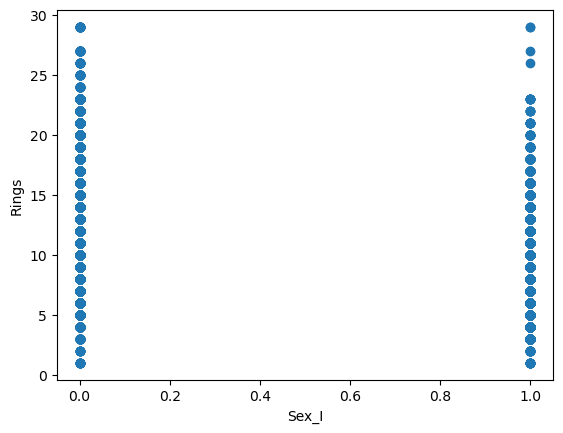

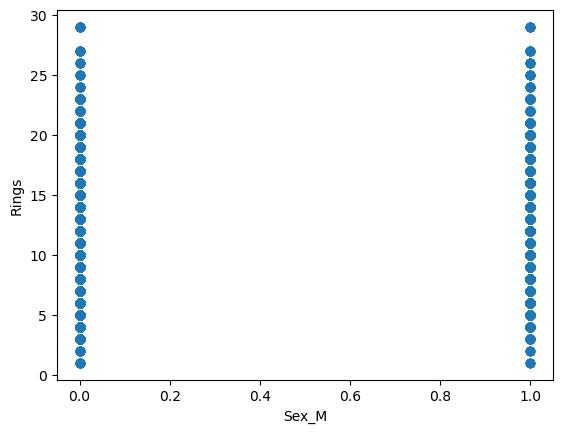

In [16]:
Index.remove('id')
Index.remove('Rings')
for X in Index:
        plt.scatter(abalone[X], abalone['Rings'])
        plt.xlabel(X)
        plt.ylabel("Rings")
        plt.show()


## Transform 'Rings'

In [17]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
data = abalone['Rings'].to_numpy().reshape(-1, 1)
pt.fit(data)
data2 = pt.transform(data)
print(pt.lambdas_)

abalone['T_Rings'] = data2


[0.00897431]


In [18]:
abalone['Log_Whole weight'] = np.log(abalone['Whole weight'])
abalone['Log_Shell weight'] = np.log(abalone['Shell weight'])
abalone['Log_Whole weight.2'] = np.log(abalone['Whole weight.2'])
abalone['Log_Whole weight.1'] = np.log(abalone['Whole weight.1'])
abalone['Log_Diameter'] = np.log(abalone['Diameter'])

## Data Visualization after Transformations

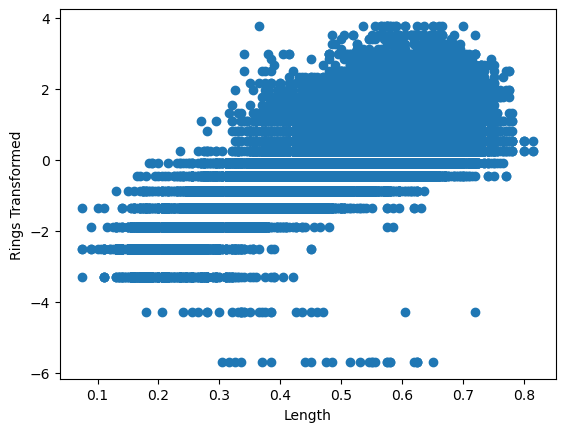

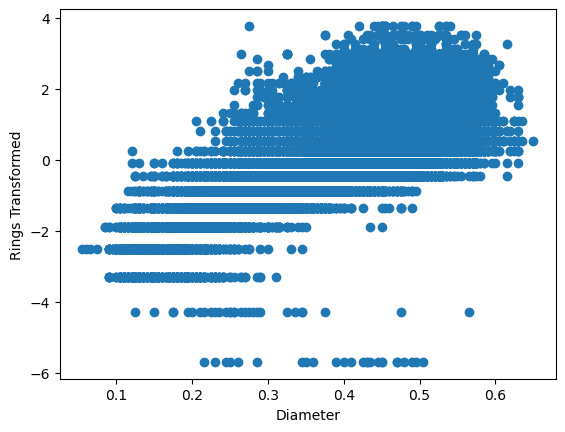

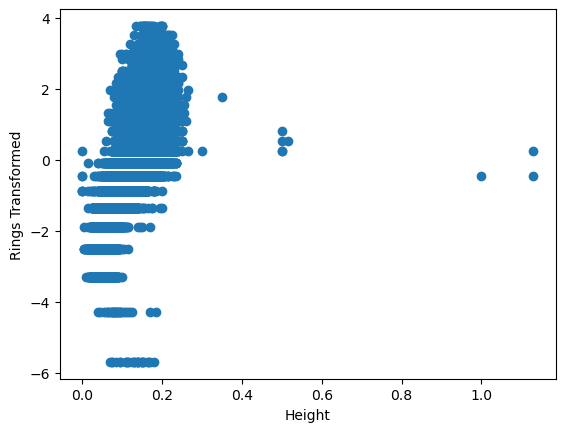

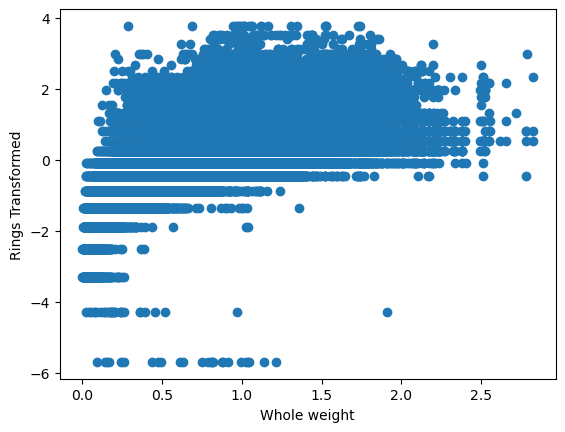

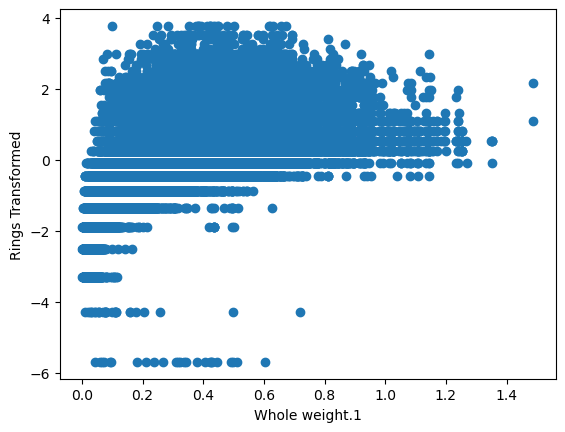

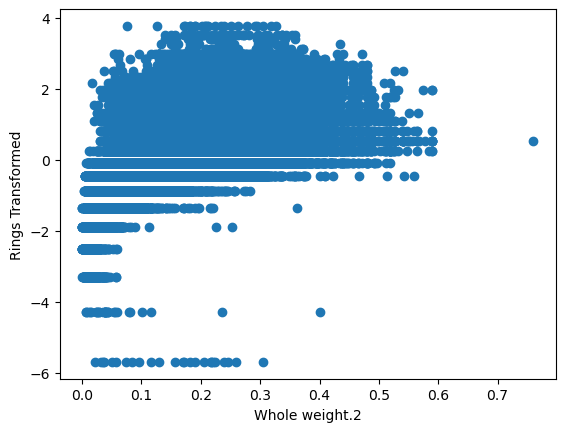

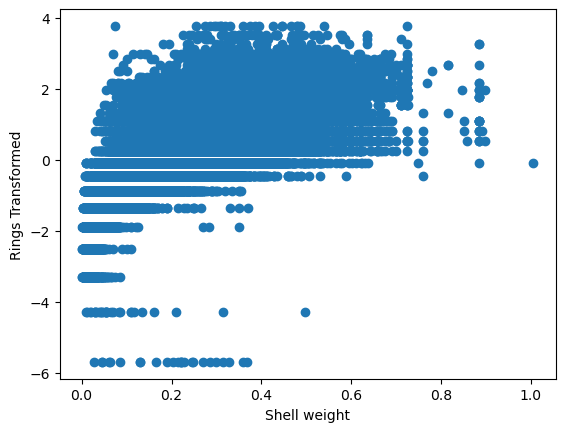

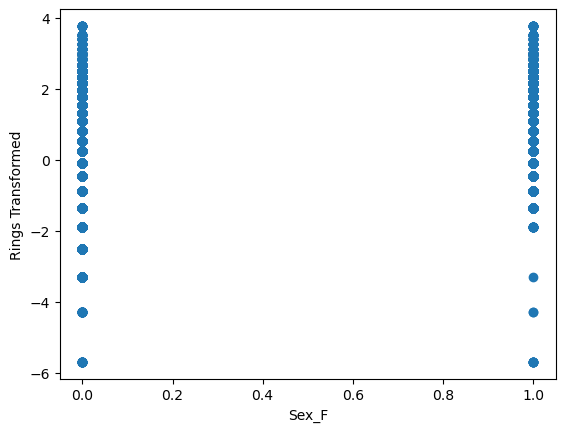

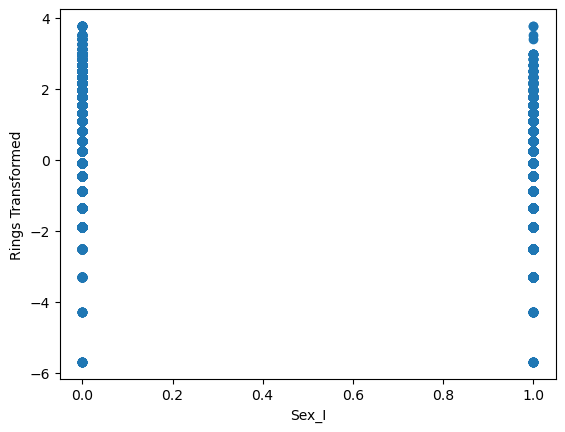

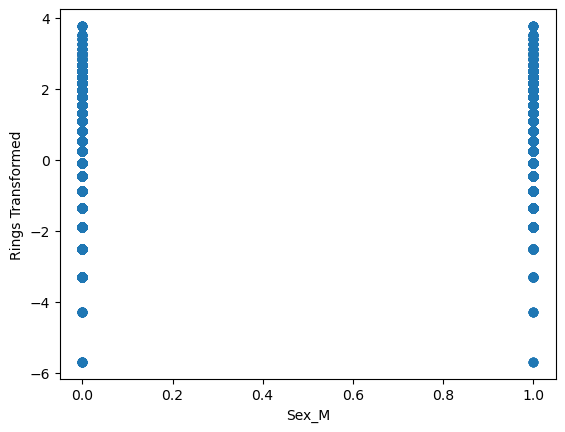

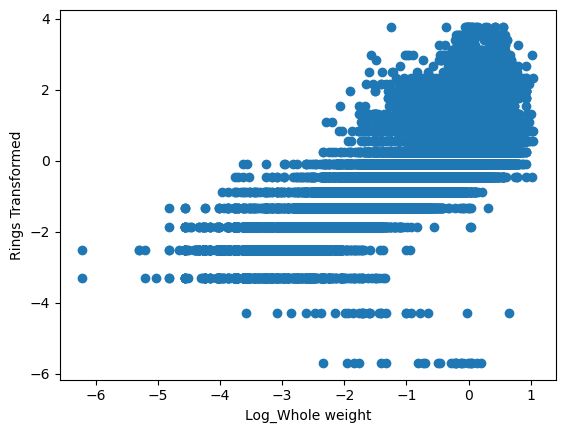

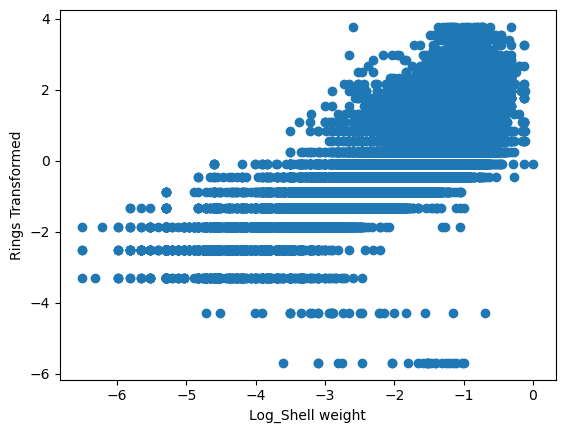

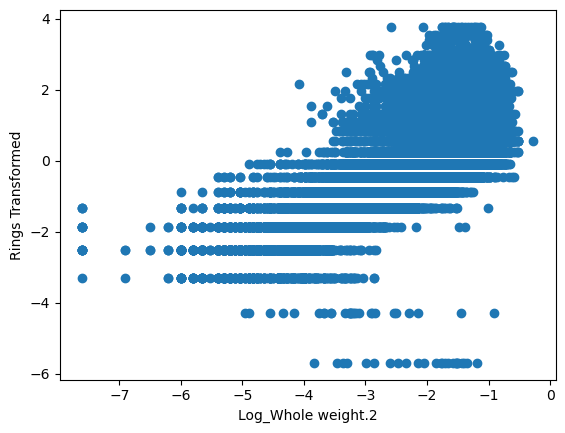

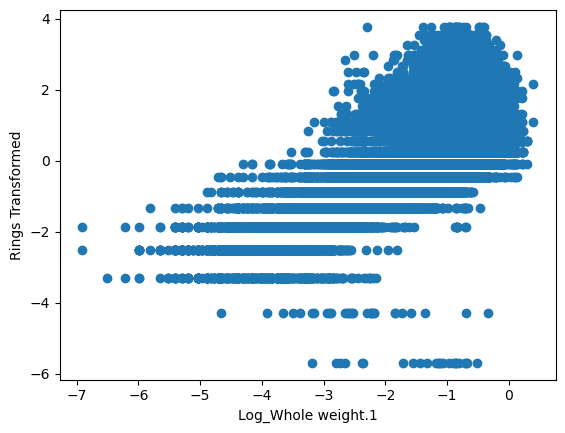

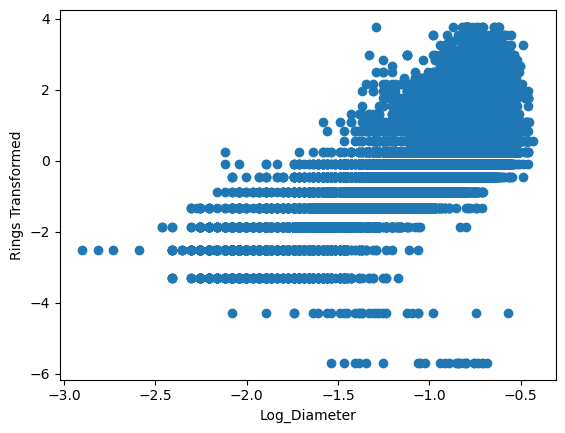

In [19]:
Index = list(abalone.columns)
Index.remove('id')
Index.remove('Rings')
Index.remove('T_Rings')
for X in Index:
        plt.scatter(abalone[X], abalone['T_Rings'])
        plt.xlabel(X)
        plt.ylabel("Rings Transformed")
        plt.show()


## Correlation after Transformation  
Merging DataFrames: https://www.statology.org/cbind-in-python/ 

The correlation is stronger between Transformed Rings and all Explanatory Variables. And the correlation is stronger for all Log transformed explanatory variables. 

A New Dataset will be created with transformed variables. 

In [20]:
cor_df = abalone.corr().stack().reset_index()
cor_df.columns = ['Var_1', 'Var_2', 'r']
df1 = cor_df[cor_df['Var_1'] == 'Rings']
df2 = cor_df[cor_df['Var_1'] == 'T_Rings']
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
pd.concat([df1, df2], axis = 1)

Var_1               Var_2         r    Var_1               Var_2         r
0   Rings                  id  0.000938  T_Rings                  id  0.002062
1   Rings              Length  0.623786  T_Rings              Length  0.715636
2   Rings            Diameter  0.636832  T_Rings            Diameter  0.725869
3   Rings              Height  0.665772  T_Rings              Height  0.734479
4   Rings        Whole weight  0.617274  T_Rings        Whole weight  0.673313
5   Rings      Whole weight.1  0.515067  T_Rings      Whole weight.1  0.583386
6   Rings      Whole weight.2  0.588954  T_Rings      Whole weight.2  0.648139
7   Rings        Shell weight  0.694766  T_Rings        Shell weight  0.736328
8   Rings               Rings  1.000000  T_Rings               Rings  0.972731
9   Rings               Sex_F  0.296411  T_Rings               Sex_F  0.320415
10  Rings               Sex_I -0.516591  T_Rings               Sex_I -0.567943
11  Rings               Sex_M  0.240048  T_Rings               Sex_M  0.269145
12  Rings             T_Rings  0.972731  T_Rings             T_Rings  1.000000
13  Rings    Log_Whole weight  0.637922  T_Rings    Log_Whole weight  0.740499
14  Rings    Log_Shell weight  0.676650  T_Rings    Log_Shell weight  0.773849
15  Rings  Log_Whole weight.2  0.625211  T_Rings  Log_Whole weight.2  0.728094
16  Rings  Log_Whole weight.1  0.582226  T_Rings  Log_Whole weight.1  0.691455
17  Rings        Log_Diameter  0.625074  T_Rings        Log_Diameter  0.730423

In [21]:
list(abalone.columns)
abalone_New = pd.DataFrame(abalone[['Length', 'Height', 'Sex_F', 'Sex_I', 'Sex_M', 'T_Rings', 'Log_Whole weight',
                       'Log_Shell weight', 'Log_Whole weight.2', 'Log_Whole weight.1', 'Log_Diameter']])

### Examining Small Rings

In [22]:
abalone_New['Young'] = 0
abalone_New['Young'] = 1*np.where(abalone_New['T_Rings'] <= -4, 1, 0)

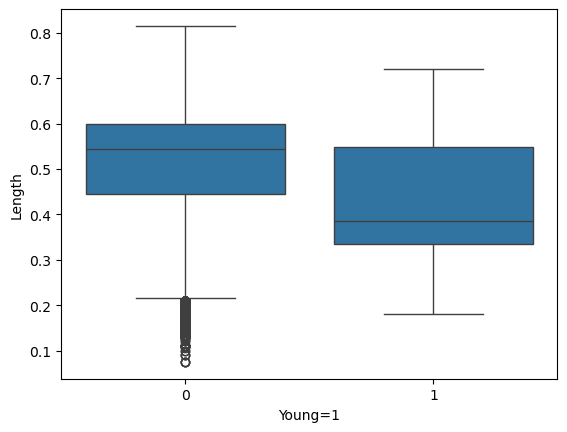

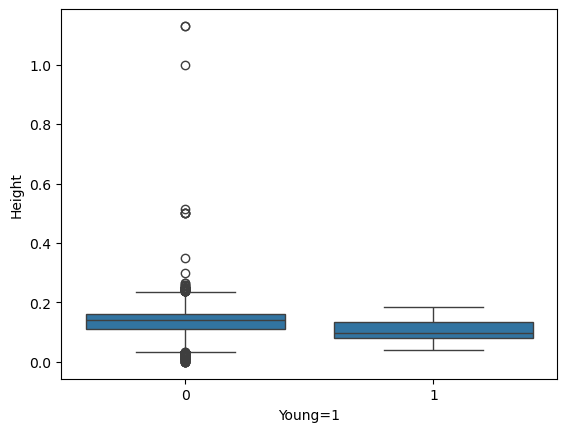

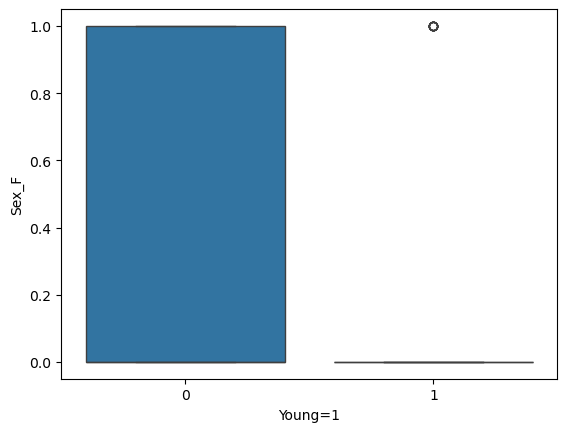

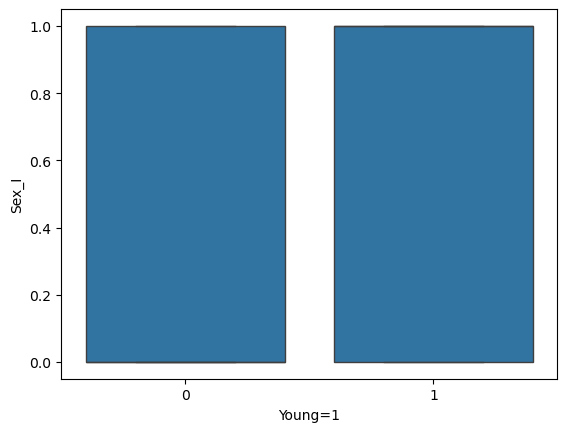

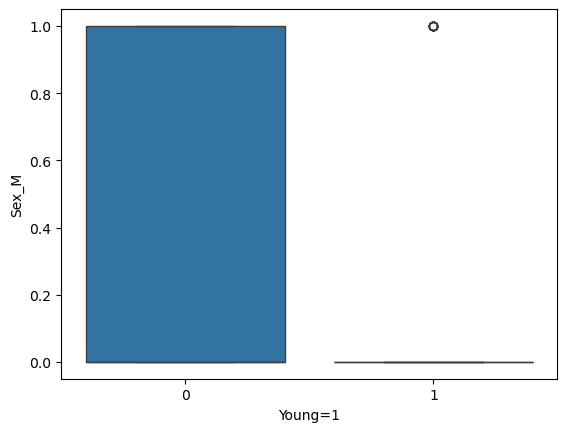

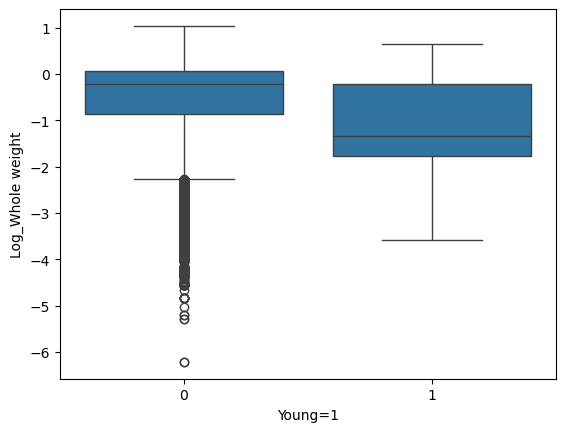

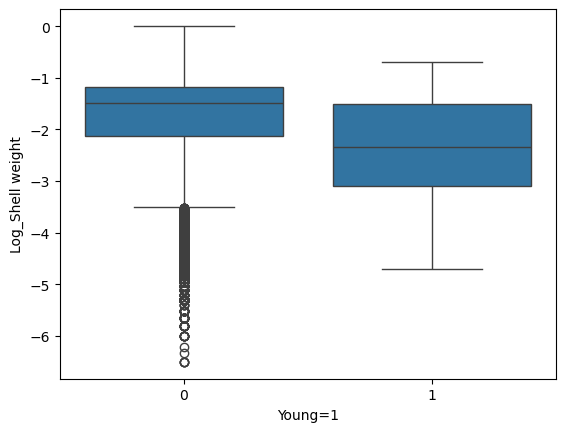

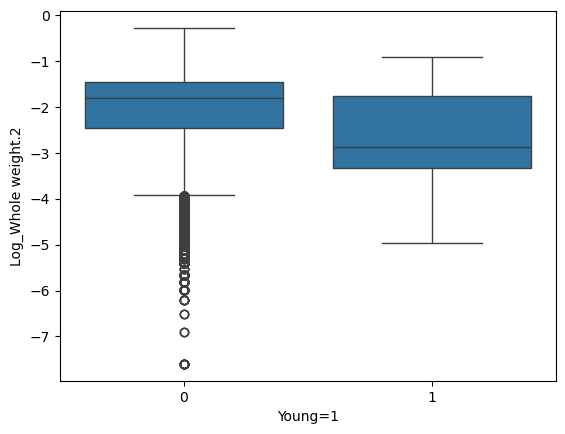

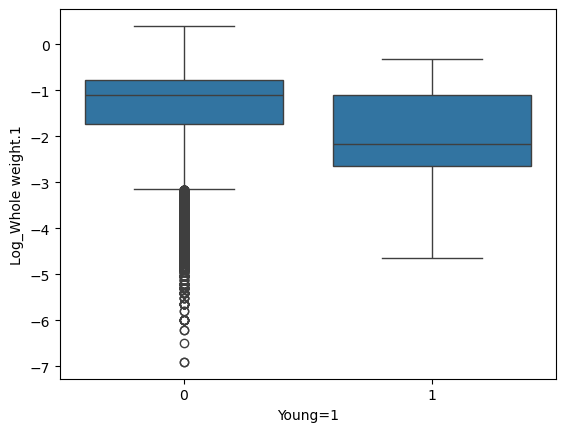

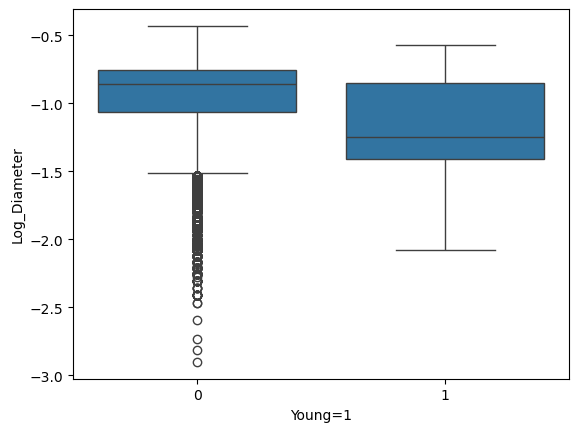

In [23]:
Index = list(abalone_New.columns)
Index.remove('T_Rings')
Index.remove('Young')
for X in Index:
        sns.boxplot(y = abalone_New[X], x = abalone_New['Young'])
        plt.ylabel(X)
        plt.xlabel("Young=1")
        plt.show()


### Creating a Tall Feature

In [24]:
abalone_New['Tall'] = "Not"
abalone_New.loc[abalone_New['Height'] > .4, 'Tall'] = "Yes"
abalone_New.loc[abalone_New['Height'] > .8, 'Tall'] = "Extra"

abalone_New = pd.get_dummies(abalone_New, columns=['Tall'], drop_first = False)


## Lasso Applied for Variable Selection

In [25]:
design = MS(abalone_New.columns.drop(['T_Rings', 'Young'])).fit(abalone_New)
Y = np.array(abalone_New['T_Rings'])
D = design.fit_transform(abalone_New)
D = D.drop(['intercept', 'Sex_I'], axis=1)
X = np.asarray(D)

In [26]:
K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)
scaler = StandardScaler(with_mean=True,  with_std=True)


lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

0.0007738486723752282

This error was noted by the ISLP Professor in the lecture video. It is not a surprise nor does it effect the calculations. 

In [27]:
lambdas, soln_array = skl.Lasso.path(X, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.263007687521167, tolerance: 9.061500000000006
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.311600386441569, tolerance: 9.061500000000006
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.81324384653999, tolerance: 9.061500000000006
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\

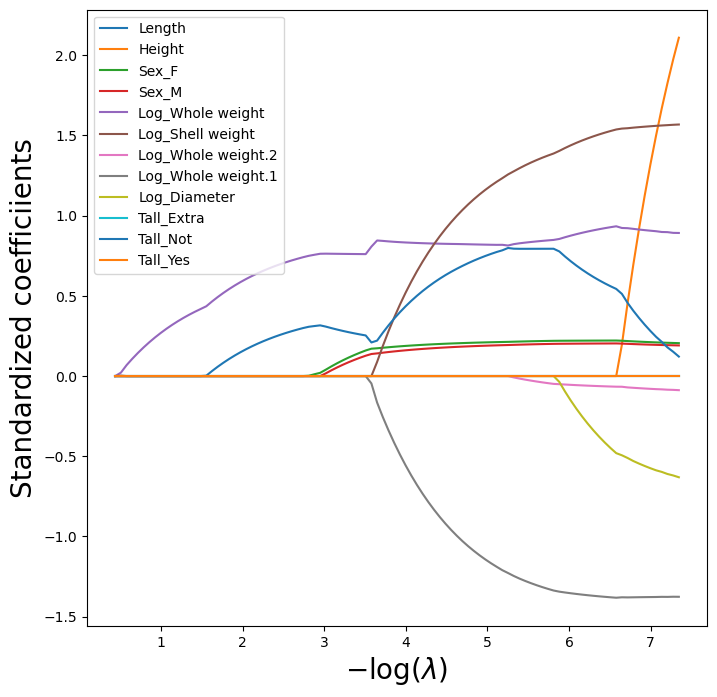

In [28]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

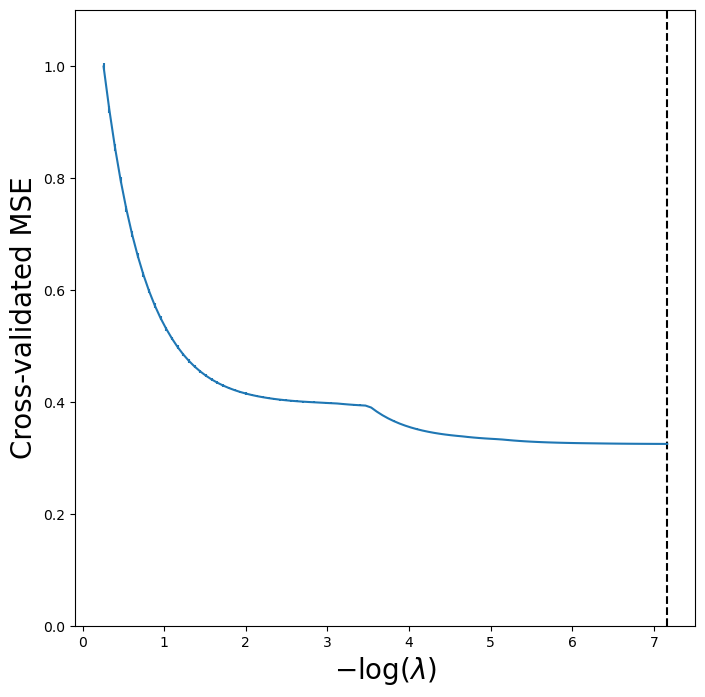

In [29]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([0,1.1])
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [30]:
print('MSE: ', np.min(tuned_lasso.mse_path_.mean(1)))
print('R2: ', 1-np.min(tuned_lasso.mse_path_.mean(1))/np.var(Y))

MSE:  0.32463470458549215
R2:  0.6753652954145078


In [31]:
tuned_lasso.coef_

array([-0.24717466,  0.25218174,  0.0915501 ,  0.08978644,  0.65807133,
        1.24916524, -0.0583276 , -1.10755899, -0.04789365, -0.02248531,
        0.02404482, -0.        ])

In [32]:
D.columns[np.where(tuned_lasso.coef_ != 0)]

Index(['Length', 'Height', 'Sex_F', 'Sex_M', 'Log_Whole weight',
       'Log_Shell weight', 'Log_Whole weight.2', 'Log_Whole weight.1',
       'Log_Diameter', 'Tall_Extra', 'Tall_Not'],
      dtype='object')

R squared training set 66.95
MSE 0.3305210725385915


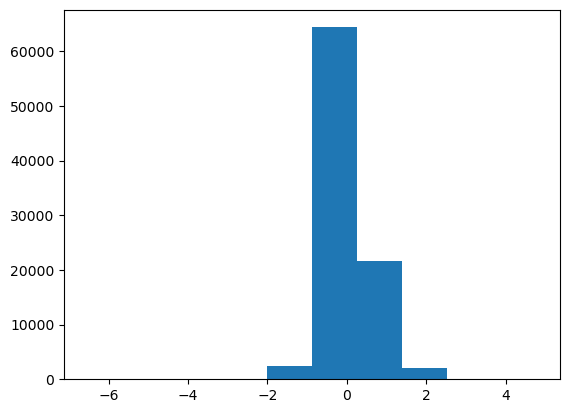

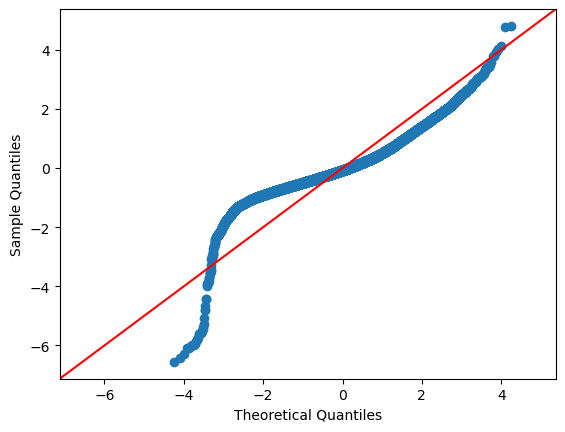

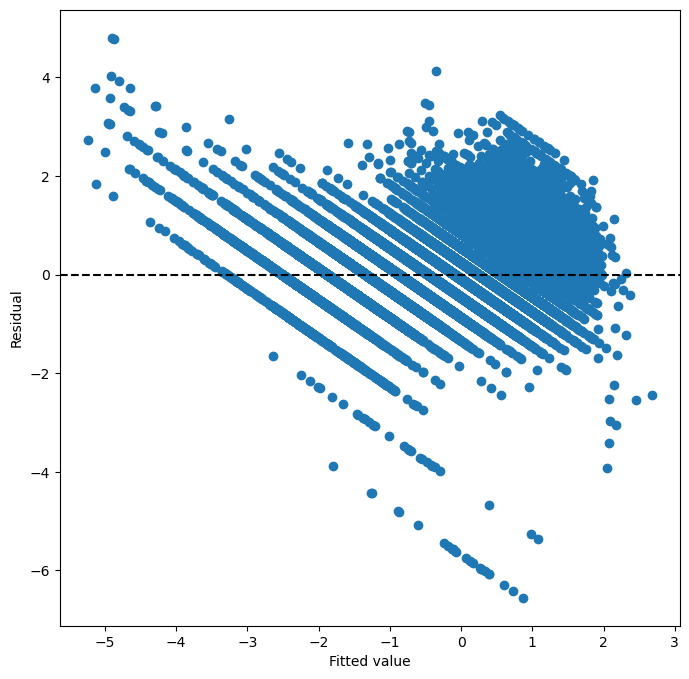

In [33]:
reg = skl.Lasso(tuned_lasso.alpha_, fit_intercept = True)
reg.fit(X,Y)
print('R squared training set', round(reg.score(X, Y)*100, 2))

Y_pred = reg.predict(X)
resid = Y - Y_pred
plt.hist(resid)
sm.qqplot(resid, line ='45') 
print('MSE',np.mean(resid**2))


ax = subplots(figsize=(8,8))[1]
ax.scatter(Y_pred, resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In [34]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF

vals = [VIF(D, i)
        for i in range(1, D.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=D.columns[1:])
vif

vif
Height                 8.706642
Sex_F                  2.124288
Sex_M                  2.017843
Log_Whole weight     121.328275
Log_Shell weight      44.378476
Log_Whole weight.2    32.887953
Log_Whole weight.1    45.426328
Log_Diameter          54.918778
Tall_Extra             1.214441
Tall_Not            1317.736853
Tall_Yes               1.109442

## Lasso Applied on Polynomial Features

In [35]:
polyFeatures = PolynomialFeatures(degree=3, include_bias=False)
xPoly = polyFeatures.fit_transform(D)
xPoly_names = polyFeatures.get_feature_names_out(D.columns)
Xnew = pd.DataFrame(xPoly, columns = xPoly_names)
X = np.asarray(Xnew)

In [36]:
K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)
scaler = StandardScaler(with_mean=True,  with_std=True)


lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.81365296048898, tolerance: 7.236620528034802
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.5555949009904, tolerance: 7.219990284260632
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.7381370572402375, tolerance: 7.26713065780309
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coor

0.0007810693671403431

In [37]:
lambdas, soln_array = skl.Lasso.path(X, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=Xnew.columns,
                         index=-np.log(lambdas))

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.49600396763708, tolerance: 9.061500000000006
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.25853081796231, tolerance: 9.061500000000006
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.215395714614715, tolerance: 9.061500000000006
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_

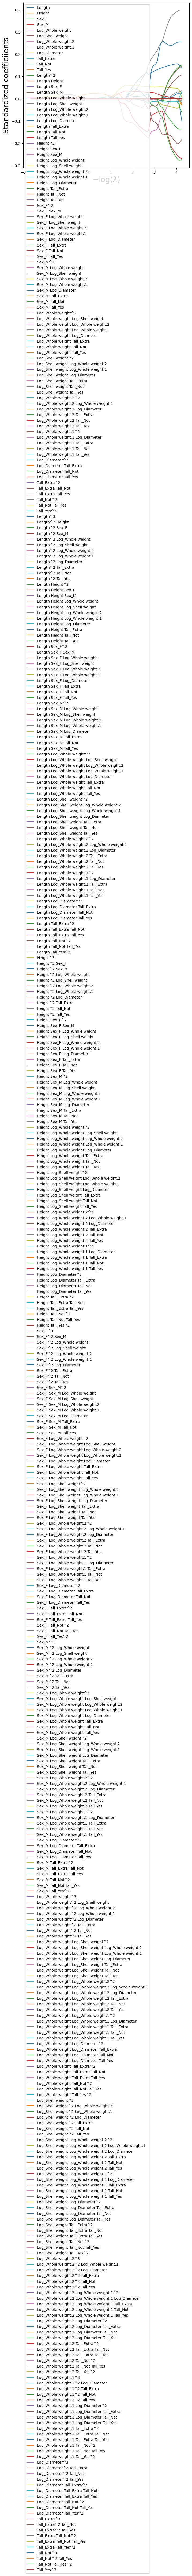

In [38]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

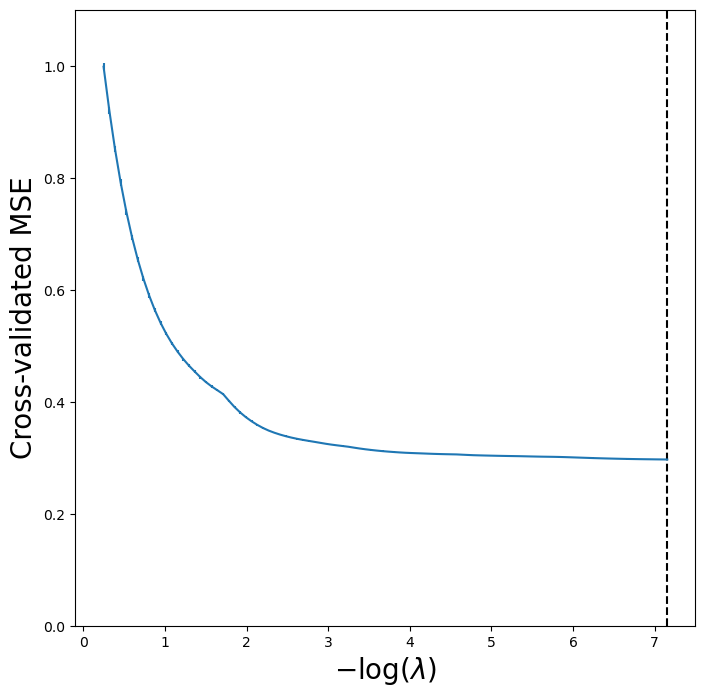

In [39]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([0,1.1])
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [40]:
print('MSE: ', np.min(tuned_lasso.mse_path_.mean(1)))
print('R2: ', 1-np.min(tuned_lasso.mse_path_.mean(1))/np.var(Y))

MSE:  0.2968442156410268
R2:  0.7031557843589732


In [41]:
tuned_lasso.coef_


array([ 0.00000000e+00,  1.20065238e-01,  0.00000000e+00, -0.00000000e+00,
        4.97557069e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        3.26944038e-02,  9.22431339e-03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  7.49302824e-02,
        2.80859352e-01, -0.00000000e+00, -2.93625076e-01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.93087780e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [42]:
Vars = Xnew.columns[np.where(tuned_lasso.coef_ != 0)]
print(Vars)

Index(['Height', 'Log_Whole weight', 'Length Log_Whole weight',
       'Length Log_Shell weight', 'Height Log_Whole weight',
       'Height Log_Shell weight', 'Height Log_Whole weight.1',
       'Sex_M Log_Whole weight.1', 'Log_Whole weight.2 Log_Whole weight.1',
       'Log_Whole weight.1 Log_Diameter', 'Length^3', 'Length^2 Height',
       'Length^2 Sex_F', 'Length^2 Sex_M', 'Length^2 Log_Shell weight',
       'Length Height Sex_M', 'Length Height Log_Shell weight',
       'Length Height Log_Whole weight.1', 'Length Sex_F Log_Shell weight',
       'Length Sex_F Tall_Yes', 'Length Log_Whole weight^2',
       'Length Log_Whole weight Tall_Not', 'Length Log_Shell weight Tall_Not',
       'Height^2 Log_Whole weight', 'Height^2 Log_Whole weight.2',
       'Height Sex_M Log_Whole weight.1',
       'Height Log_Whole weight Log_Whole weight.2',
       'Height Log_Whole weight Tall_Not',
       'Height Log_Shell weight Tall_Extra',
       'Height Log_Whole weight.2 Tall_Not',
       'Height L

In [43]:
X = MS(list(Vars)).fit_transform(Xnew)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     4337.
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:40:25   Log-Likelihood:                -73204.
No. Observations:               90615   AIC:                         1.465e+05
Df Residuals:                   90564   BIC:                         1.470e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
intercept                                           -0.0680      0.274     -0.248      0.804      -0.605       0.469
Height                                              10.2303      2.428      4.213      0.000       5.471      14.989
Log_Whole weight                                    -0.2962      0.137     -2.160      0.031      -0.565      -0.027
Length Log_Whole weight                             -0.2776      0.899     -0.309      0.757      -2.039       1.484
Length Log_Shell weight                              0.8898      1.143      0.778      0.436      -1.350       3.130
Height Log_Whole weight                              2.0104      2.025      0.993      0.321      -1.958       5.979
Height Log_Shell weight                              9.3279      1.821      5.122      0.000       5.758      12.898
Height Log_Whole weight.1                           -5.4635      0.984     -5.555      0.000      -7.391      -3.536
Sex_M Log_Whole weight.1                             1.4130      0.749      1.887      0.059      -0.055       2.881
Log_Whole weight.2 Log_Whole weight.1                1.3300      1.430      0.930      0.352      -1.473       4.133
Log_Whole weight.1 Log_Diameter                      0.0497      0.407      0.122      0.903      -0.747       0.847
Length^3                                             1.3229      1.293      1.023      0.306      -1.212       3.857
Length^2 Height                                    -19.7487      6.298     -3.136      0.002     -32.093      -7.404
Length^2 Sex_F                                       0.1175      0.142      0.825      0.409      -0.162       0.397
Length^2 Sex_M                                      -0.2603      0.177     -1.473      0.141      -0.607       0.086
Length^2 Log_Shell weight                           -1.0285      0.864     -1.191      0.234      -2.722       0.665
Length Height Sex_M                                 -0.6119      0.692     -0.885      0.376      -1.968       0.744
Length Height Log_Shell weight                       3.4824      3.467      1.004      0.315      -3.313      10.278
Length Height Log_Whole weight.1                     9.3771      1.518      6.176      0.000       6.401      12.353
Length Sex_F Log_Shell weight                        0.4224      0.065      6.456      0.000       0.294       0.551
Length Sex_F Tall_Yes                               -3.5166      2.556     -1.376      0.169      -8.527       1.493
Length Log_Whole weight^2                            0.5265      0.092      5.735      0.000       0.347       0.706
Length Log_Whole weight Tall_Not                     1.3184      0.960      1.374      0.169      -0.562       3.199
Length Log_Shell weight Tall_Not         

MSE 0.2945954655803625


77326

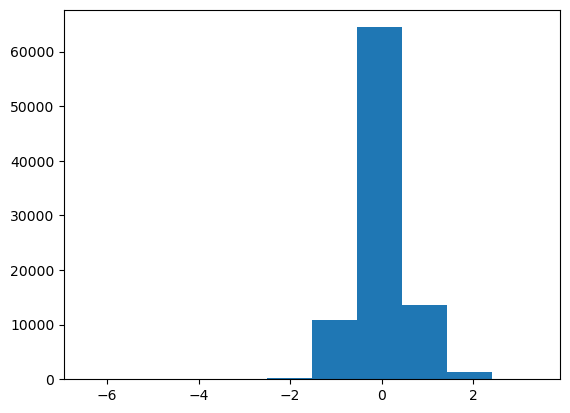

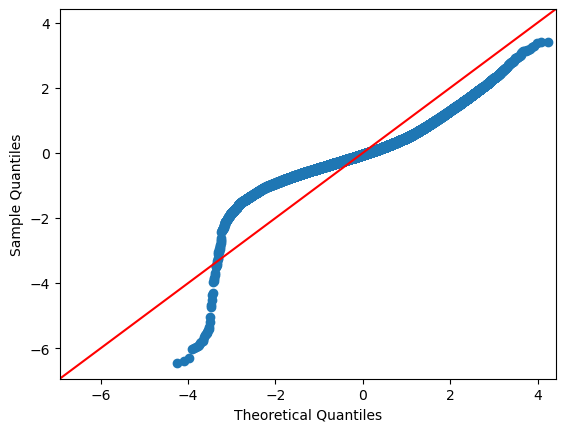

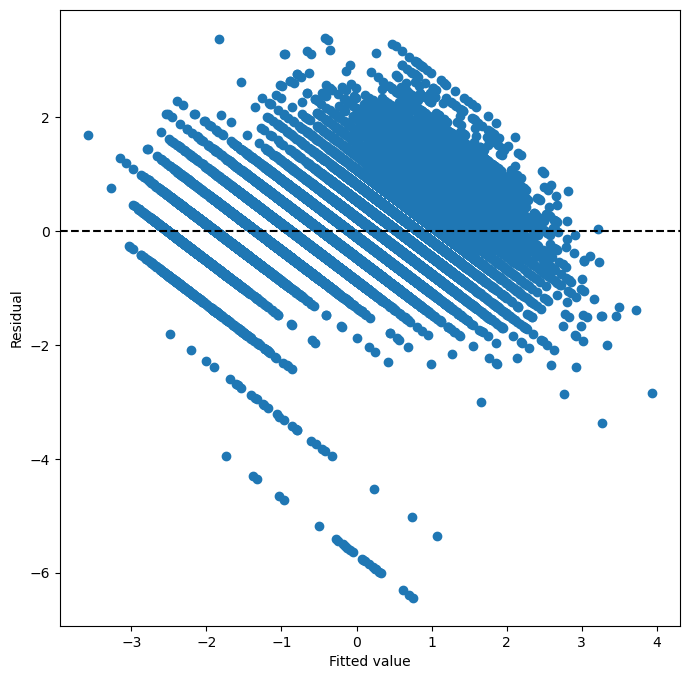

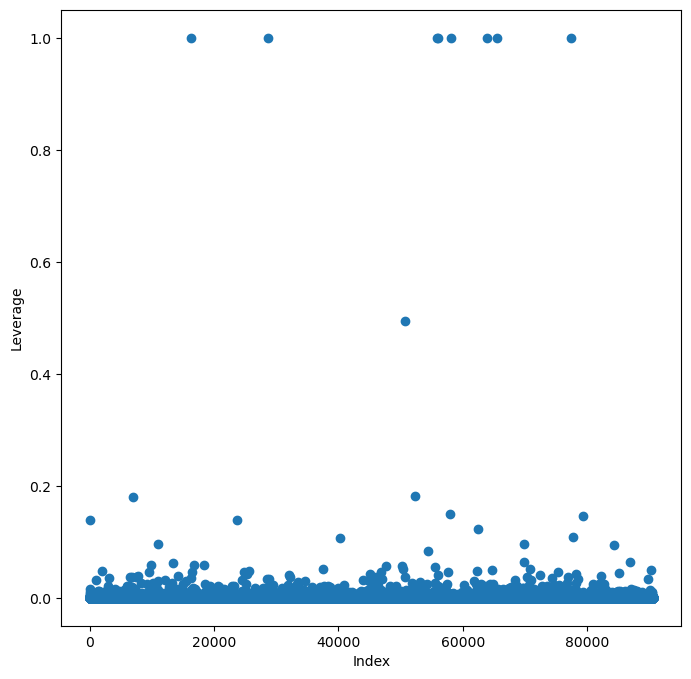

In [44]:
Y_pred = results.predict(X)
resid = Y - Y_pred
plt.hist(resid)
sm.qqplot(resid, line ='45') 
print('MSE',np.mean(resid**2))

ax = subplots(figsize=(8,8))[1]
ax.scatter(Y_pred, resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

### Export Predictions

In [54]:
test = pd.read_csv('test.csv')

test = pd.get_dummies(test, columns=['Sex'], drop_first = False)

test['Log_Whole weight'] = np.log(test['Whole weight'])
test['Log_Shell weight'] = np.log(test['Shell weight'])
test['Log_Whole weight.2'] = np.log(test['Whole weight.2'])
test['Log_Whole weight.1'] = np.log(test['Whole weight.1'])
test['Log_Diameter'] = np.log(test['Diameter'])
test_New = pd.DataFrame(test[['Length', 'Height', 'Sex_F', 'Sex_I', 'Sex_M', 'Log_Whole weight',
                                'Log_Shell weight', 'Log_Whole weight.2', 'Log_Whole weight.1', 'Log_Diameter']])
test_New['Tall'] = "Not"
test_New.loc[test_New['Height'] > .4, 'Tall'] = "Yes"
test_New.loc[test_New['Height'] > .8, 'Tall'] = "Extra"
test_New = pd.get_dummies(test_New, columns=['Tall'], drop_first = False)

designTest = MS(test_New.columns).fit(test_New)
D_test = designTest.fit_transform(test_New)
D_test = D_test.drop(['intercept', 'Sex_I'], axis=1)

polyFeatures = PolynomialFeatures(degree=3, include_bias=False)
xPolyTest = polyFeatures.fit_transform(D_test)
xPolyTest_names = polyFeatures.get_feature_names_out(D_test.columns)
XTestnew = pd.DataFrame(xPolyTest, columns = xPolyTest_names)
XTest = MS(list(Vars)).fit_transform(XTestnew)

T_Rings = results.predict(XTest)
print(T_Rings)


Rings = np.round(pt.inverse_transform(T_Rings.to_numpy().reshape(-1, 1)), 0)
output = pd.DataFrame(test[['id']])
output['Rings'] = Rings
print(output['Rings'].min())
print(output)
output.to_csv('model5.csv', index = False)

0       -0.043382
1        0.165289
2        0.299913
3        0.286364
4       -0.605423
           ...   
60406   -1.251929
60407    0.004503
60408    0.584536
60409    1.023284
60410   -0.301166
Length: 60411, dtype: float64
3.0
           id  Rings
0       90615    9.0
1       90616   10.0
2       90617   10.0
3       90618   10.0
4       90619    8.0
...       ...    ...
60406  151021    6.0
60407  151022    9.0
60408  151023   11.0
60409  151024   13.0
60410  151025    8.0

[60411 rows x 2 columns]


### Leverage Group

In [55]:
abalone_New['Leverage'] = 0
abalone_New.loc[infl.hat_matrix_diag > .2, 'Leverage'] = 1
abalone_New_sorted = abalone_New.sort_values(by='Leverage')

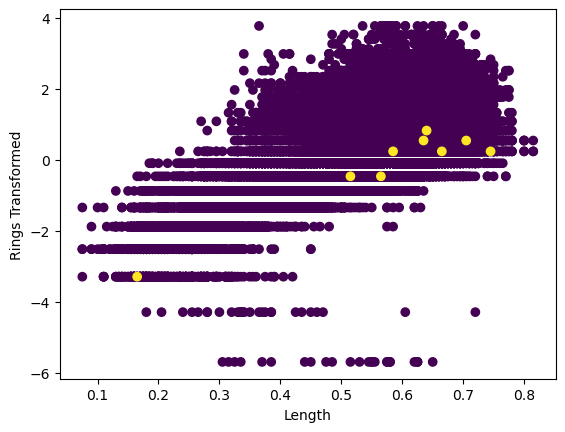

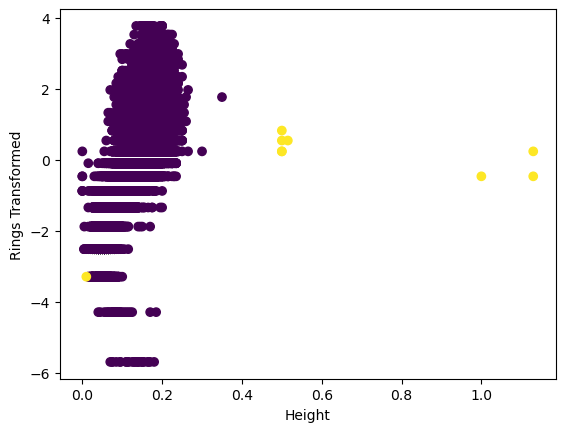

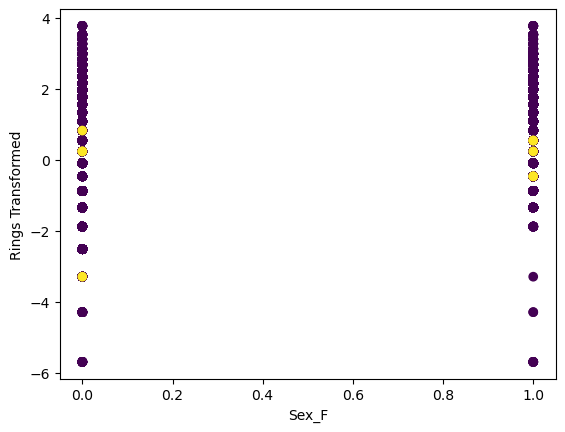

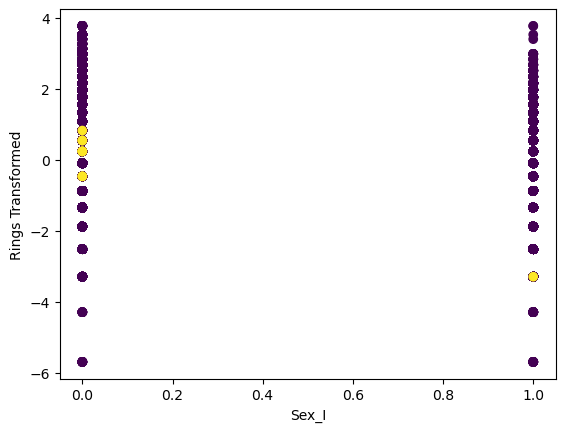

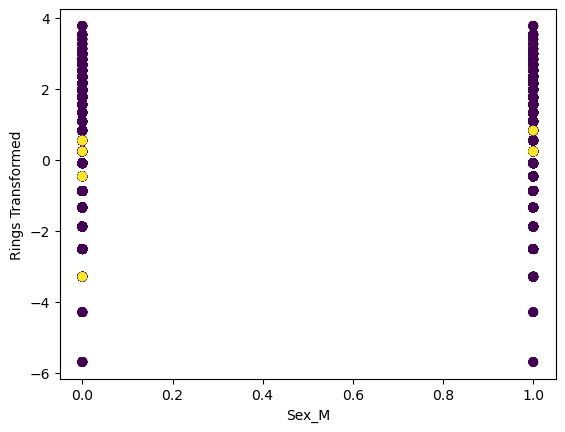

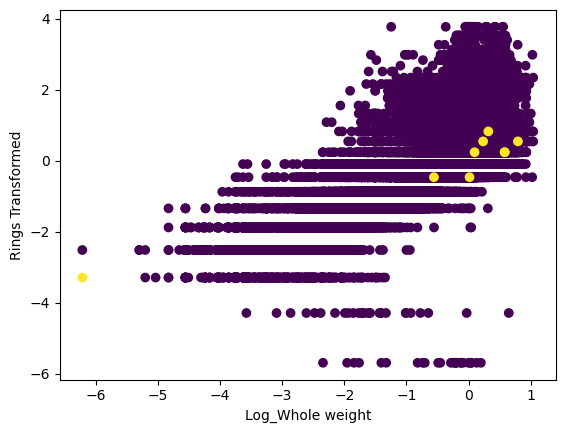

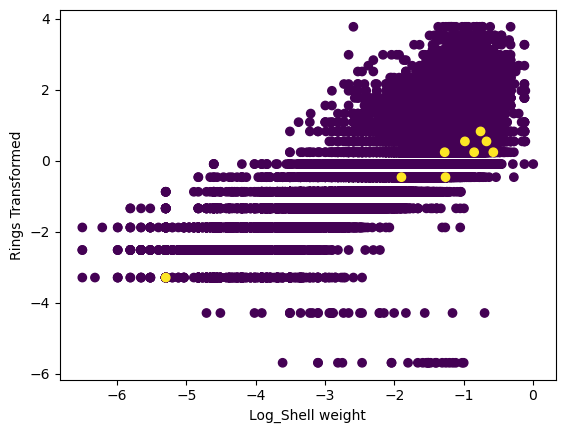

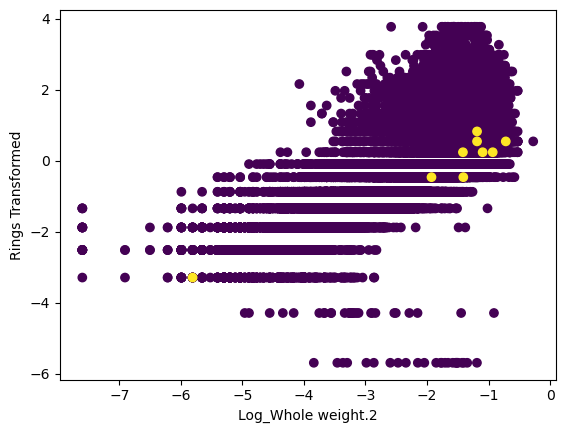

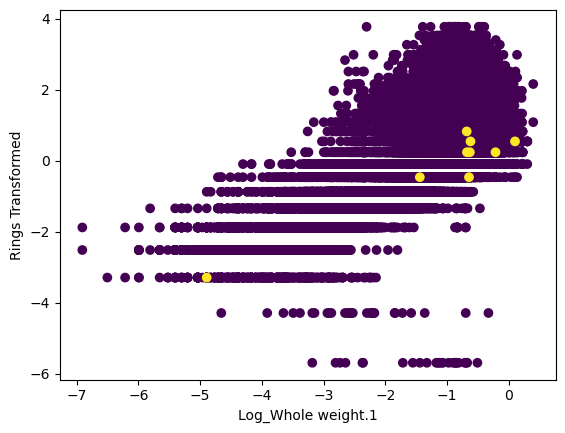

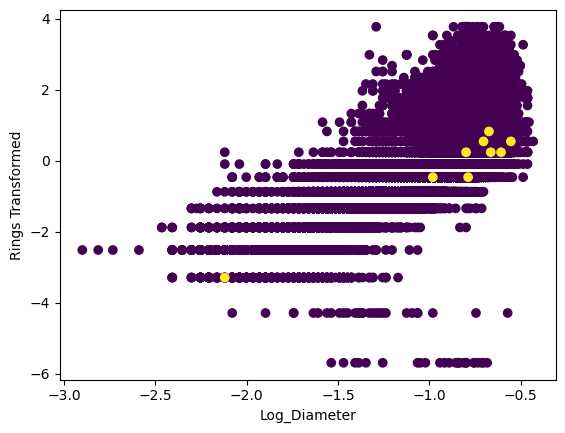

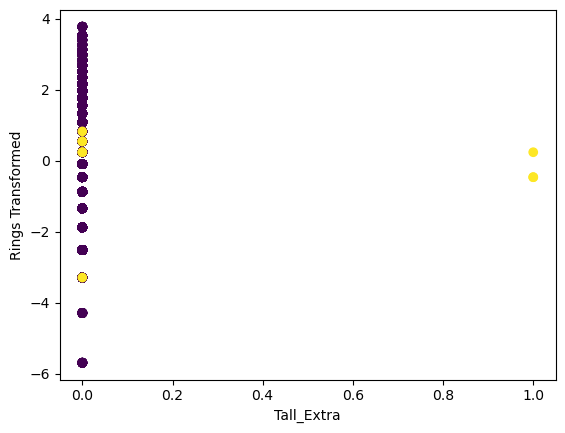

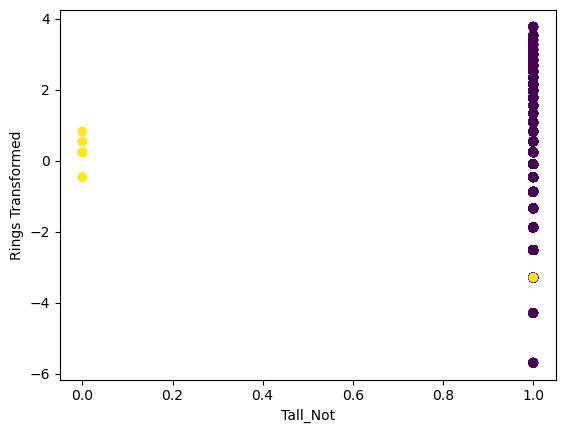

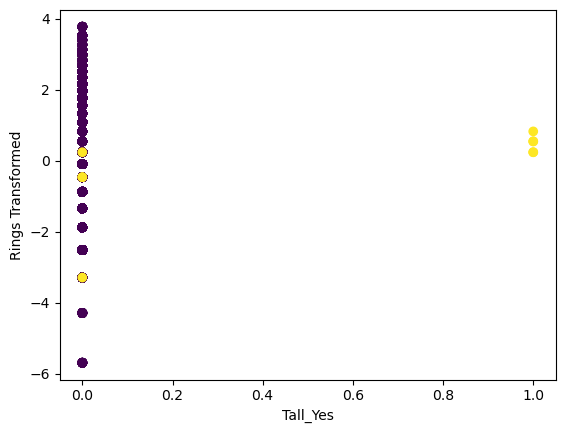

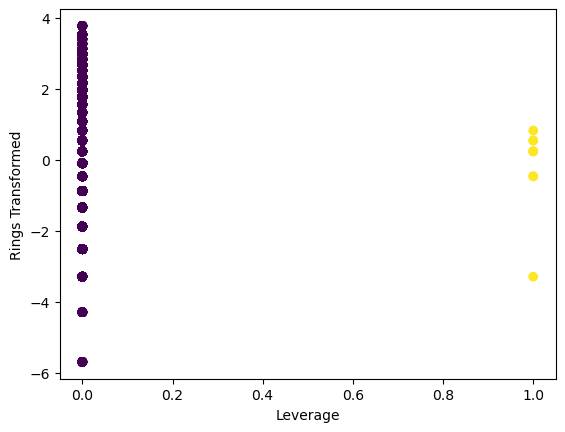

In [56]:
Index = list(abalone_New_sorted.columns)
Index.remove('T_Rings')
Index.remove('Young')
for X in Index:
        plt.scatter(abalone_New_sorted[X], abalone_New_sorted['T_Rings'], c=abalone_New_sorted['Leverage'])
        plt.xlabel(X)
        plt.ylabel("Rings Transformed")
        plt.show()


## Stepwise Selection From Lasso Variables

In [57]:
X = MS(list(Vars)).fit_transform(Xnew)
X = pd.DataFrame(X)
design = MS(X.columns, intercept=False).fit(X)
X2 = design.transform(X)
#sigma2 = OLS(Y,X).fit().scale
#sigma2


strategy = Stepwise.first_peak(design,
                               direction='both',
                               max_terms=25)

Model_MSE = sklearn_selected(OLS,
                               strategy)

Model_MSE.fit(X2, Y)

In [58]:
VarsFS = Model_MSE.selected_state_
print(VarsFS)

('Height', 'Height Log_Shell weight', 'Height Log_Whole weight', 'Height Log_Whole weight Log_Whole weight.2', 'Height Log_Whole weight.1', 'Height Log_Whole weight.2 Tall_Not', 'Height Sex_M Log_Whole weight.1', 'Length Height Log_Shell weight', 'Length Height Log_Whole weight.1', 'Length Log_Shell weight', 'Length Log_Whole weight^2', 'Length^2 Sex_F', 'Length^2 Sex_M', 'Length^3', 'Log_Whole weight', 'Log_Whole weight Log_Whole weight.1 Tall_Not', 'Log_Whole weight Log_Whole weight.1 Tall_Yes', 'Log_Whole weight.1^3', 'Log_Whole weight^2 Log_Shell weight', 'Sex_F Log_Whole weight Log_Shell weight', 'Sex_F Log_Whole weight.1^2', 'Sex_F Log_Whole weight^2', 'Sex_M Log_Shell weight^2', 'Sex_M Log_Whole weight.1 Tall_Not', 'intercept')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     8987.
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:58:03   Log-Likelihood:                -73387.
No. Observations:               90615   AIC:                         1.468e+05
Df Residuals:                   90590   BIC:                         1.471e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

28651

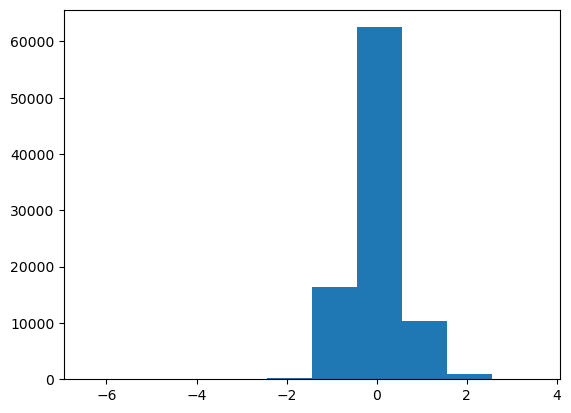

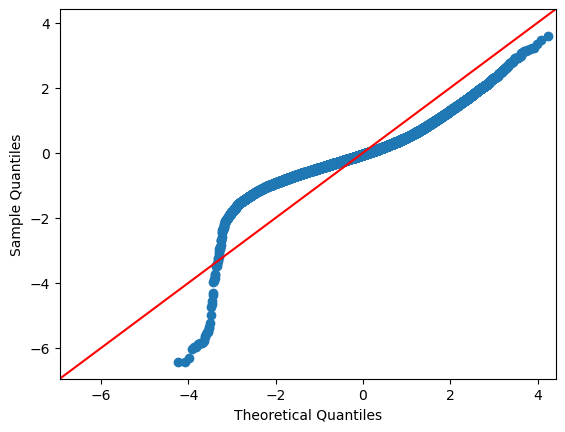

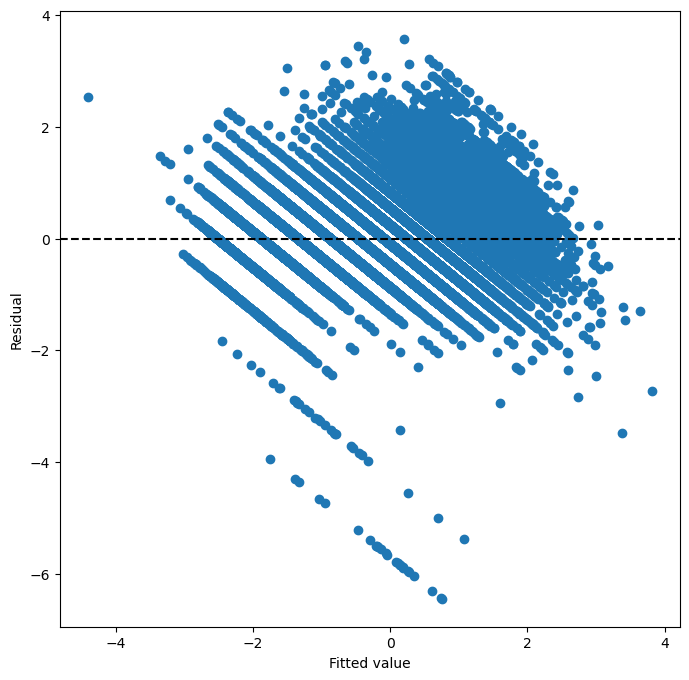

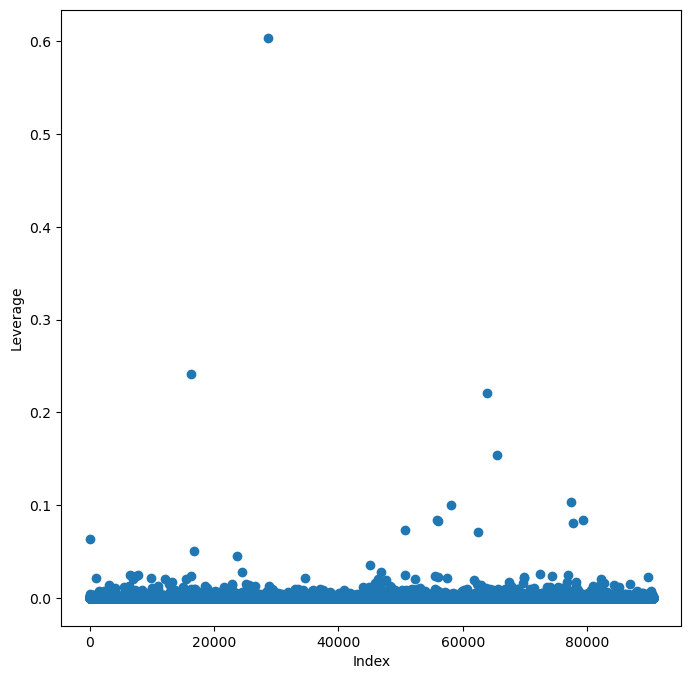

In [59]:
X3 = MS(list(VarsFS)).fit_transform(X2)
model = sm.OLS(Y, X3)
results = model.fit()
print(results.summary())

Y_pred = results.predict(X3)
resid = Y - Y_pred
plt.hist(resid)
sm.qqplot(resid, line ='45') 
print('MSE',np.mean(resid**2))

ax = subplots(figsize=(8,8))[1]
ax.scatter(Y_pred, resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

## Collinearity  
VIF > 10 is severe collinearity. Frees Book Page 167.

In [60]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF

vals = [VIF(X3, i)
        for i in range(1, X3.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X3.columns[1:])
vif

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


vif
Height                                         140.509634
Height Log_Shell weight                        118.173022
Height Log_Whole weight                        220.270882
Height Log_Whole weight Log_Whole weight.2     127.370268
Height Log_Whole weight.1                      328.277768
Height Log_Whole weight.2 Tall_Not               3.997545
Height Sex_M Log_Whole weight.1                 74.799538
Length Height Log_Shell weight                 110.046726
Length Height Log_Whole weight.1               133.134788
Length Log_Shell weight                         77.018350
Length Log_Whole weight^2                      109.332670
Length^2 Sex_F                                  15.078282
Length^2 Sex_M                                  21.079495
Length^3                                        49.321810
Log_Whole weight                               695.950502
Log_Whole weight Log_Whole weight.1 Tall_Not  1535.243818
Log_Whole weight Log_Whole weight.1 Tall_Yes     1.056238
Log_Whole weight.1^3                           169.723918
Log_Whole weight^2 Log_Shell weight             92.231815
Sex_F Log_Whole weight Log_Shell weight         34.180194
Sex_F Log_Whole weight.1^2                      30.962722
Sex_F Log_Whole weight^2                         8.644412
Sex_M Log_Shell weight^2                        30.399334
Sex_M Log_Whole weight.1 Tall_Not              129.784329
intercept                                        0.000000

Drop variable with largest VIF

In [61]:
X3.drop(['Log_Whole weight Log_Whole weight.1 Tall_Not'], axis=1, inplace=True)

vals = [VIF(X3, i)
        for i in range(1, X3.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X3.columns[1:])
vif

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


vif
Height                                        124.492808
Height Log_Shell weight                       112.352184
Height Log_Whole weight                       167.538321
Height Log_Whole weight Log_Whole weight.2    125.870604
Height Log_Whole weight.1                     270.588446
Height Log_Whole weight.2 Tall_Not              3.995656
Height Sex_M Log_Whole weight.1                74.414567
Length Height Log_Shell weight                 83.694016
Length Height Log_Whole weight.1              108.452164
Length Log_Shell weight                        64.591967
Length Log_Whole weight^2                      85.873933
Length^2 Sex_F                                 14.878038
Length^2 Sex_M                                 21.072577
Length^3                                       48.188125
Log_Whole weight                              264.443710
Log_Whole weight Log_Whole weight.1 Tall_Yes    1.056235
Log_Whole weight.1^3                           32.040836
Log_Whole weight^2 Log_Shell weight            42.152426
Sex_F Log_Whole weight Log_Shell weight        33.721900
Sex_F Log_Whole weight.1^2                     30.708681
Sex_F Log_Whole weight^2                        8.514282
Sex_M Log_Shell weight^2                       30.176921
Sex_M Log_Whole weight.1 Tall_Not             128.785384
intercept                                       0.000000

In [62]:

X3.drop(['Height Log_Whole weight.1'], axis=1, inplace=True)

vals = [VIF(X3, i)
        for i in range(1, X3.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X3.columns[1:])
vif

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


vif
Height                                        118.621818
Height Log_Shell weight                        43.710638
Height Log_Whole weight                       166.519097
Height Log_Whole weight Log_Whole weight.2    123.100621
Height Log_Whole weight.2 Tall_Not              3.995639
Height Sex_M Log_Whole weight.1                73.681946
Length Height Log_Shell weight                 56.867338
Length Height Log_Whole weight.1                7.280861
Length Log_Shell weight                        54.657207
Length Log_Whole weight^2                      75.010943
Length^2 Sex_F                                 14.190085
Length^2 Sex_M                                 21.057931
Length^3                                       47.447665
Log_Whole weight                              264.061892
Log_Whole weight Log_Whole weight.1 Tall_Yes    1.054985
Log_Whole weight.1^3                           22.378496
Log_Whole weight^2 Log_Shell weight            27.300403
Sex_F Log_Whole weight Log_Shell weight        31.880690
Sex_F Log_Whole weight.1^2                     28.652929
Sex_F Log_Whole weight^2                        8.431966
Sex_M Log_Shell weight^2                       29.483076
Sex_M Log_Whole weight.1 Tall_Not             125.939051
intercept                                       0.000000

In [63]:


X3.drop(['Log_Whole weight'], axis=1, inplace=True)

vals = [VIF(X3, i)
        for i in range(1, X3.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X3.columns[1:])
vif

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


vif
Height                                        116.927186
Height Log_Shell weight                        42.614557
Height Log_Whole weight                       116.053028
Height Log_Whole weight Log_Whole weight.2    122.924782
Height Log_Whole weight.2 Tall_Not              3.971052
Height Sex_M Log_Whole weight.1                73.306788
Length Height Log_Shell weight                 56.469298
Length Height Log_Whole weight.1                7.271432
Length Log_Shell weight                        51.895414
Length Log_Whole weight^2                      47.632340
Length^2 Sex_F                                 14.179831
Length^2 Sex_M                                 20.999598
Length^3                                       42.365755
Log_Whole weight Log_Whole weight.1 Tall_Yes    1.049603
Log_Whole weight.1^3                           20.849996
Log_Whole weight^2 Log_Shell weight            22.131979
Sex_F Log_Whole weight Log_Shell weight        31.688754
Sex_F Log_Whole weight.1^2                     28.561129
Sex_F Log_Whole weight^2                        8.388916
Sex_M Log_Shell weight^2                       29.386784
Sex_M Log_Whole weight.1 Tall_Not             125.376023
intercept                                       0.000000

In [64]:

X3.drop(['Sex_M Log_Whole weight.1 Tall_Not'], axis=1, inplace=True)

vals = [VIF(X3, i)
        for i in range(1, X3.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X3.columns[1:])
vif

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


vif
Height                                        115.508859
Height Log_Shell weight                        42.443369
Height Log_Whole weight                       116.051150
Height Log_Whole weight Log_Whole weight.2    122.856622
Height Log_Whole weight.2 Tall_Not              3.966949
Height Sex_M Log_Whole weight.1                14.234105
Length Height Log_Shell weight                 56.408329
Length Height Log_Whole weight.1                7.256641
Length Log_Shell weight                        51.452068
Length Log_Whole weight^2                      47.482404
Length^2 Sex_F                                 14.179573
Length^2 Sex_M                                 19.470160
Length^3                                       42.083417
Log_Whole weight Log_Whole weight.1 Tall_Yes    1.049446
Log_Whole weight.1^3                           20.838853
Log_Whole weight^2 Log_Shell weight            21.638756
Sex_F Log_Whole weight Log_Shell weight        31.578497
Sex_F Log_Whole weight.1^2                     28.552077
Sex_F Log_Whole weight^2                        8.332270
Sex_M Log_Shell weight^2                        3.461613
intercept                                       0.000000

In [65]:

X3.drop(['Height Log_Whole weight Log_Whole weight.2'], axis=1, inplace=True)

vals = [VIF(X3, i)
        for i in range(1, X3.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X3.columns[1:])
vif

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


vif
Height                                        113.648485
Height Log_Shell weight                        28.219318
Height Log_Whole weight                        82.465856
Height Log_Whole weight.2 Tall_Not              3.577757
Height Sex_M Log_Whole weight.1                14.230318
Length Height Log_Shell weight                 48.964932
Length Height Log_Whole weight.1                7.193639
Length Log_Shell weight                        50.511009
Length Log_Whole weight^2                      32.325712
Length^2 Sex_F                                 14.176127
Length^2 Sex_M                                 19.463257
Length^3                                       33.028015
Log_Whole weight Log_Whole weight.1 Tall_Yes    1.042564
Log_Whole weight.1^3                           20.474526
Log_Whole weight^2 Log_Shell weight            21.517934
Sex_F Log_Whole weight Log_Shell weight        31.491675
Sex_F Log_Whole weight.1^2                     28.517027
Sex_F Log_Whole weight^2                        8.322232
Sex_M Log_Shell weight^2                        3.461385
intercept                                       0.000000

In [66]:


X3.drop(['Height'], axis=1, inplace=True)

vals = [VIF(X3, i)
        for i in range(1, X3.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X3.columns[1:])
vif

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


vif
Height Log_Shell weight                       25.148521
Height Log_Whole weight                       46.569209
Height Log_Whole weight.2 Tall_Not             3.285486
Height Sex_M Log_Whole weight.1               14.191470
Length Height Log_Shell weight                30.739796
Length Height Log_Whole weight.1               5.737203
Length Log_Shell weight                       12.015900
Length Log_Whole weight^2                     22.084428
Length^2 Sex_F                                14.034726
Length^2 Sex_M                                19.453331
Length^3                                      33.026503
Log_Whole weight Log_Whole weight.1 Tall_Yes   1.025875
Log_Whole weight.1^3                          19.943686
Log_Whole weight^2 Log_Shell weight           20.305737
Sex_F Log_Whole weight Log_Shell weight       30.089735
Sex_F Log_Whole weight.1^2                    27.135748
Sex_F Log_Whole weight^2                       8.286411
Sex_M Log_Shell weight^2                       3.454030
intercept                                      0.000000

In [67]:


X3.drop(['Height Log_Whole weight'], axis=1, inplace=True)

vals = [VIF(X3, i)
        for i in range(1, X3.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X3.columns[1:])
vif

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


vif
Height Log_Shell weight                       20.879081
Height Log_Whole weight.2 Tall_Not             3.095162
Height Sex_M Log_Whole weight.1               14.151032
Length Height Log_Shell weight                23.796128
Length Height Log_Whole weight.1               4.622380
Length Log_Shell weight                        7.532039
Length Log_Whole weight^2                     22.084125
Length^2 Sex_F                                13.962289
Length^2 Sex_M                                19.264021
Length^3                                      31.554366
Log_Whole weight Log_Whole weight.1 Tall_Yes   1.022728
Log_Whole weight.1^3                          19.942699
Log_Whole weight^2 Log_Shell weight           20.276430
Sex_F Log_Whole weight Log_Shell weight       28.023774
Sex_F Log_Whole weight.1^2                    26.355603
Sex_F Log_Whole weight^2                       7.890539
Sex_M Log_Shell weight^2                       3.453571
intercept                                      0.000000

In [68]:


X3.drop(['Length^3'], axis=1, inplace=True)

vals = [VIF(X3, i)
        for i in range(1, X3.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X3.columns[1:])
vif

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


vif
Height Log_Shell weight                       11.652836
Height Log_Whole weight.2 Tall_Not             3.095059
Height Sex_M Log_Whole weight.1               11.431532
Length Height Log_Shell weight                11.420581
Length Height Log_Whole weight.1               4.618044
Length Log_Shell weight                        6.298299
Length Log_Whole weight^2                     19.850721
Length^2 Sex_F                                11.839552
Length^2 Sex_M                                14.361314
Log_Whole weight Log_Whole weight.1 Tall_Yes   1.021393
Log_Whole weight.1^3                          19.942417
Log_Whole weight^2 Log_Shell weight           20.020048
Sex_F Log_Whole weight Log_Shell weight       27.982714
Sex_F Log_Whole weight.1^2                    24.963177
Sex_F Log_Whole weight^2                       6.985442
Sex_M Log_Shell weight^2                       3.262736
intercept                                      0.000000

In [69]:


X3.drop(['Sex_F Log_Whole weight Log_Shell weight'], axis=1, inplace=True)

vals = [VIF(X3, i)
        for i in range(1, X3.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X3.columns[1:])
vif

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


vif
Height Log_Shell weight                       11.629742
Height Log_Whole weight.2 Tall_Not             3.055898
Height Sex_M Log_Whole weight.1               11.430054
Length Height Log_Shell weight                11.351437
Length Height Log_Whole weight.1               4.534091
Length Log_Shell weight                        5.877621
Length Log_Whole weight^2                     19.202965
Length^2 Sex_F                                 7.619822
Length^2 Sex_M                                14.213574
Log_Whole weight Log_Whole weight.1 Tall_Yes   1.021097
Log_Whole weight.1^3                          19.938240
Log_Whole weight^2 Log_Shell weight           19.819213
Sex_F Log_Whole weight.1^2                     6.874975
Sex_F Log_Whole weight^2                       4.234627
Sex_M Log_Shell weight^2                       3.252300
intercept                                      0.000000

In [70]:


X3.drop(['Log_Whole weight^2 Log_Shell weight'], axis=1, inplace=True)

vals = [VIF(X3, i)
        for i in range(1, X3.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X3.columns[1:])
vif

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


vif
Height Log_Shell weight                       11.147693
Height Log_Whole weight.2 Tall_Not             3.048864
Height Sex_M Log_Whole weight.1               11.055003
Length Height Log_Shell weight                10.225701
Length Height Log_Whole weight.1               4.384276
Length Log_Shell weight                        5.731822
Length Log_Whole weight^2                     16.832584
Length^2 Sex_F                                 7.355310
Length^2 Sex_M                                13.624815
Log_Whole weight Log_Whole weight.1 Tall_Yes   1.020934
Log_Whole weight.1^3                           6.433667
Sex_F Log_Whole weight.1^2                     6.537377
Sex_F Log_Whole weight^2                       4.042628
Sex_M Log_Shell weight^2                       3.235553
intercept                                      0.000000

In [71]:


X3.drop(['Length Log_Whole weight^2'], axis=1, inplace=True)

vals = [VIF(X3, i)
        for i in range(1, X3.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X3.columns[1:])
vif

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


vif
Height Log_Shell weight                        7.819344
Height Log_Whole weight.2 Tall_Not             3.048013
Height Sex_M Log_Whole weight.1                9.683914
Length Height Log_Shell weight                 4.686545
Length Height Log_Whole weight.1               4.370486
Length Log_Shell weight                        5.495292
Length^2 Sex_F                                 6.188613
Length^2 Sex_M                                11.289205
Log_Whole weight Log_Whole weight.1 Tall_Yes   1.019089
Log_Whole weight.1^3                           2.853401
Sex_F Log_Whole weight.1^2                     5.289461
Sex_F Log_Whole weight^2                       3.444992
Sex_M Log_Shell weight^2                       3.175093
intercept                                      0.000000

In [72]:


X3.drop(['Length^2 Sex_M'], axis=1, inplace=True)

vals = [VIF(X3, i)
        for i in range(1, X3.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X3.columns[1:])
vif

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


vif
Height Log_Shell weight                       7.628464
Height Log_Whole weight.2 Tall_Not            3.034366
Height Sex_M Log_Whole weight.1               4.064042
Length Height Log_Shell weight                3.615733
Length Height Log_Whole weight.1              2.741586
Length Log_Shell weight                       4.492455
Length^2 Sex_F                                2.459306
Log_Whole weight Log_Whole weight.1 Tall_Yes  1.019016
Log_Whole weight.1^3                          2.849939
Sex_F Log_Whole weight.1^2                    3.903002
Sex_F Log_Whole weight^2                      2.976883
Sex_M Log_Shell weight^2                      2.771959
intercept                                     0.000000

### Model after Removing Collinearity

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                 1.667e+04
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:58:31   Log-Likelihood:                -75774.
No. Observations:               90615   AIC:                         1.516e+05
Df Residuals:                   90602   BIC:                         1.517e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

28651

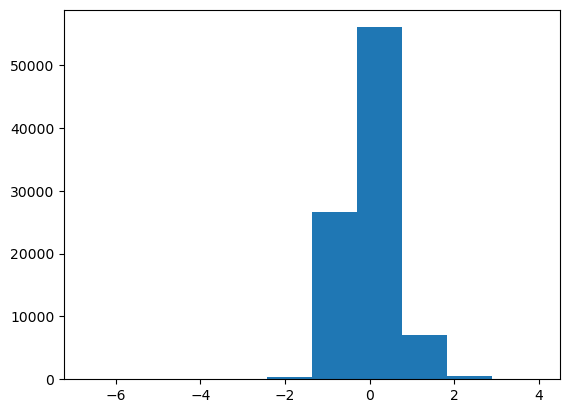

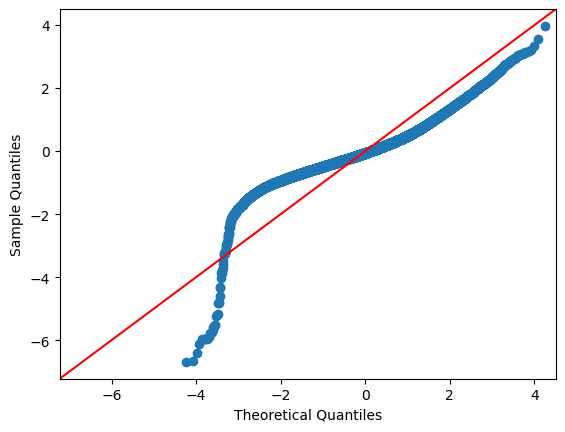

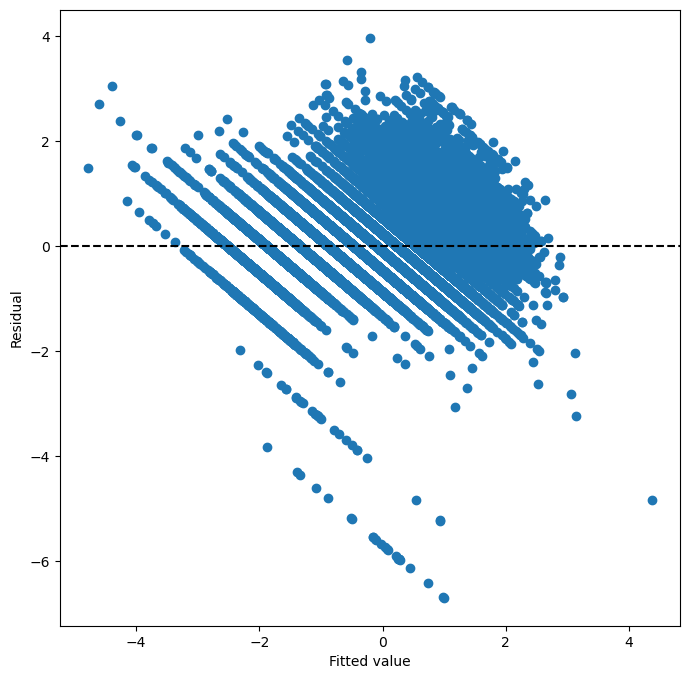

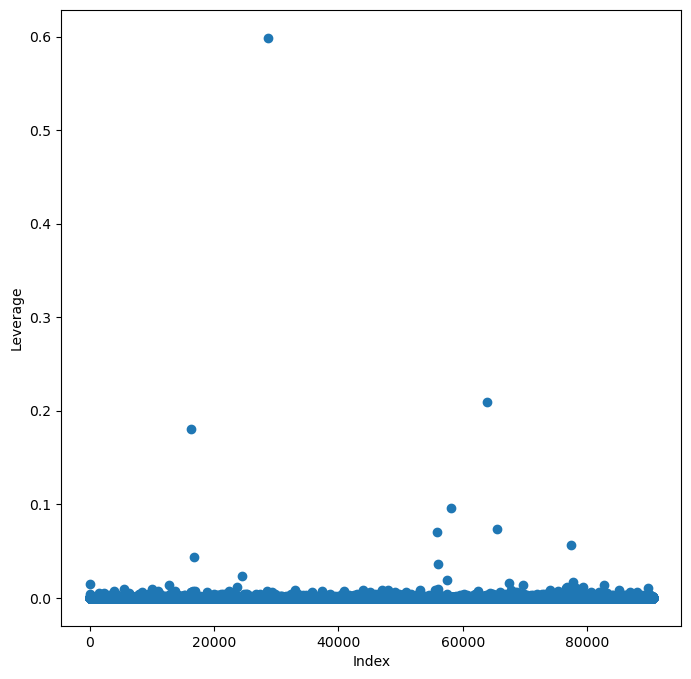

In [73]:
model = sm.OLS(Y, X3)
results = model.fit()
print(results.summary())

Y_pred = results.predict(X3)
resid = Y - Y_pred
plt.hist(resid)
sm.qqplot(resid, line ='45') 
print('MSE',np.mean(resid**2))

ax = subplots(figsize=(8,8))[1]
ax.scatter(Y_pred, resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X3.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

### Examine Leverage Points

In [74]:
abalone_New['Leverage'] = 0
abalone_New.loc[infl.hat_matrix_diag > .1, 'Leverage'] = 1
abalone_New_sorted = abalone_New.sort_values(by='Leverage')

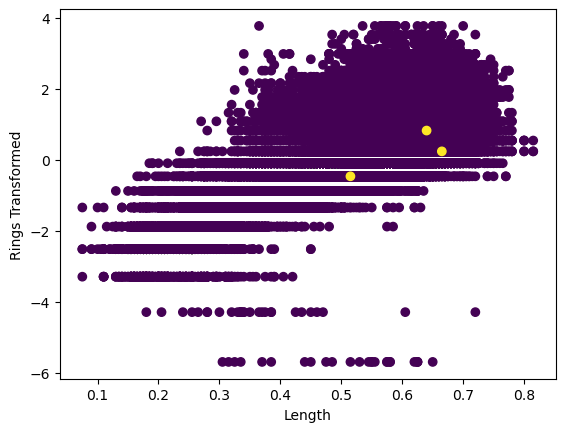

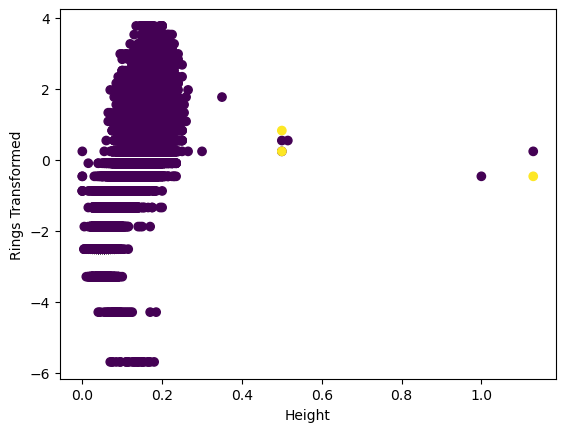

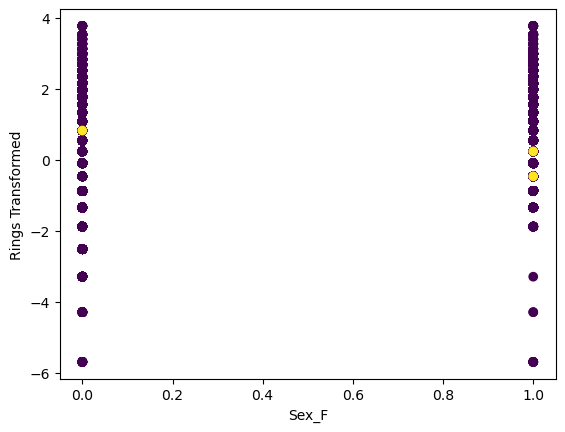

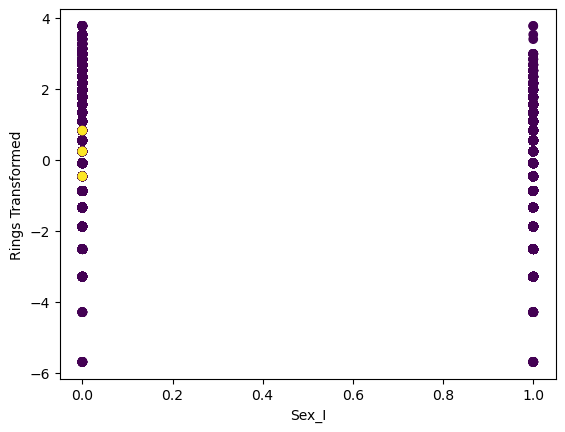

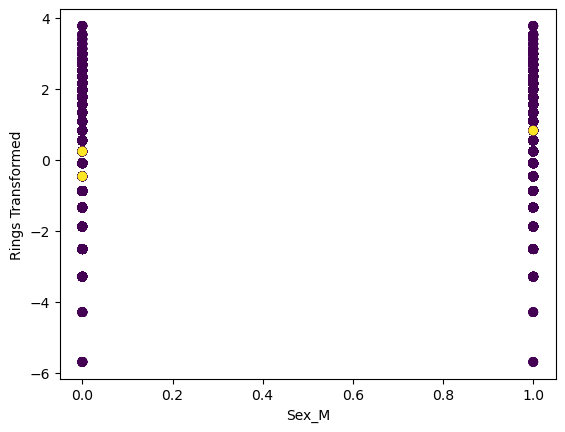

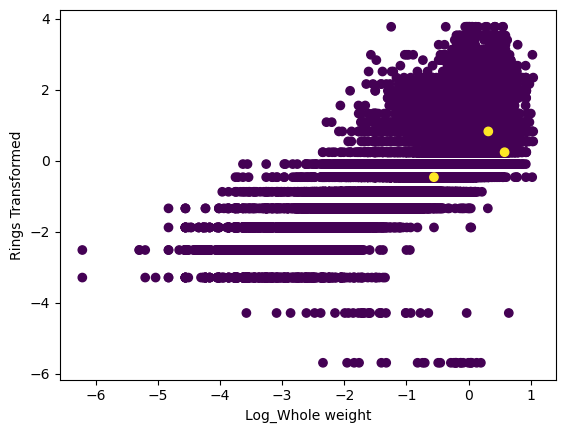

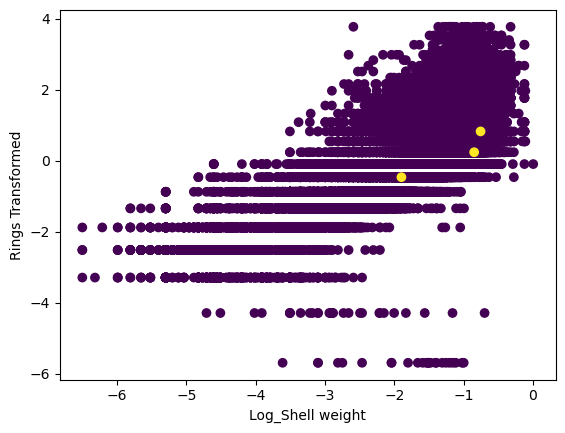

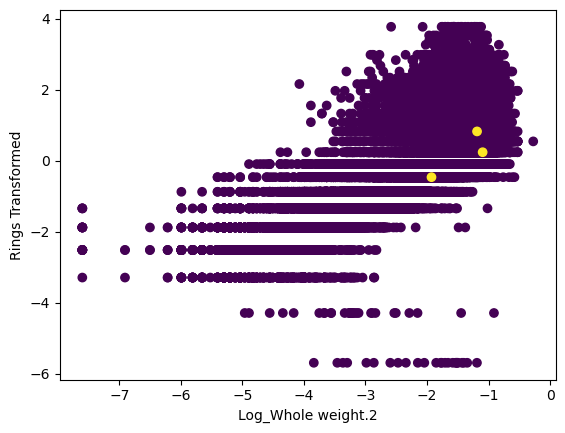

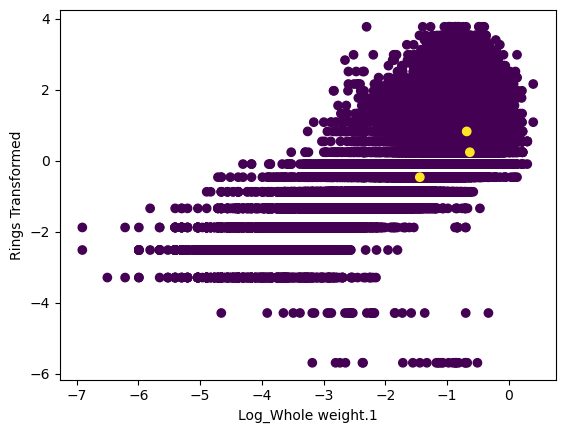

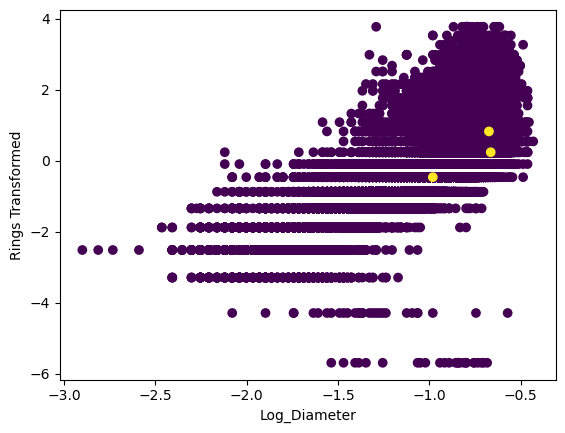

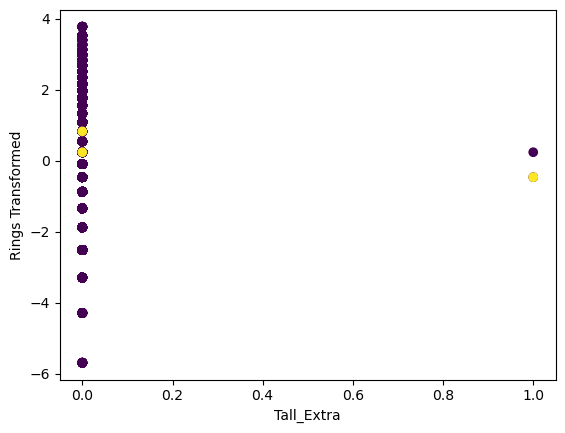

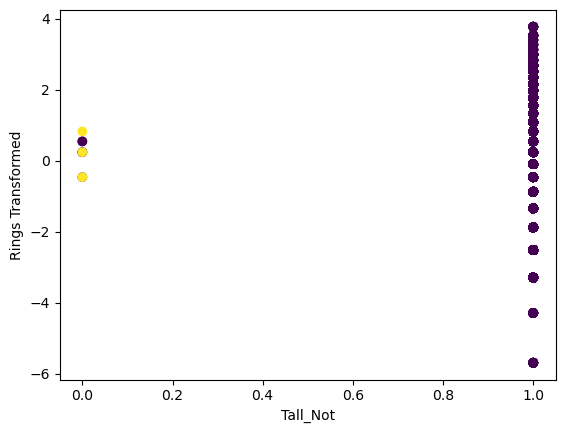

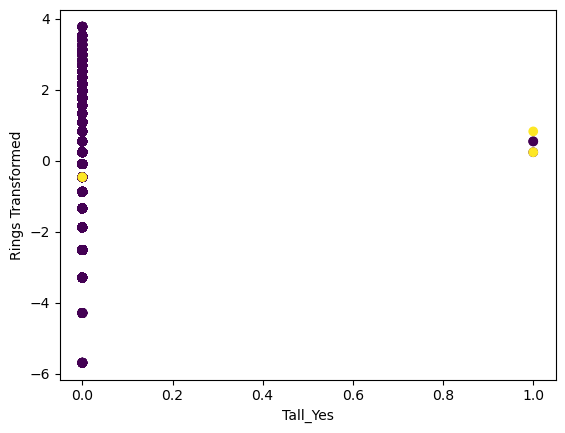

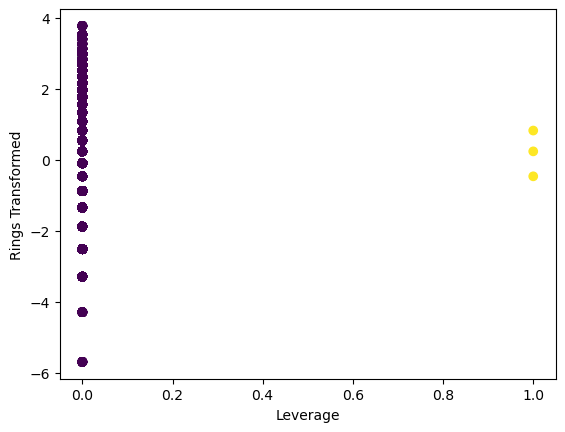

In [75]:
Index = list(abalone_New_sorted.columns)
Index.remove('T_Rings')
Index.remove('Young')
for X in Index:
        plt.scatter(abalone_New_sorted[X], abalone_New_sorted['T_Rings'], c=abalone_New_sorted['Leverage'])
        plt.xlabel(X)
        plt.ylabel("Rings Transformed")
        plt.show()


### Homoscedasticity 

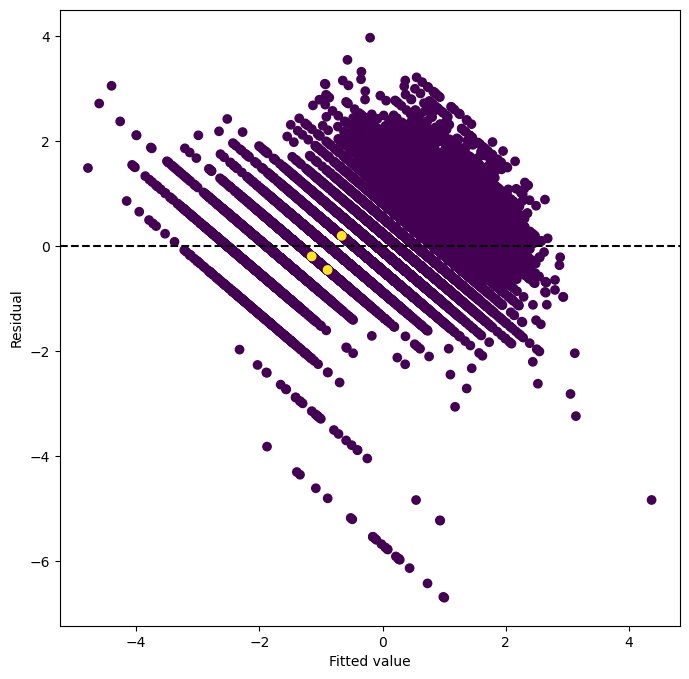

In [76]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(Y_pred, resid, c=abalone_New_sorted['Leverage'])
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In [77]:
import statsmodels.stats.api as sms
sms.het_breuschpagan(resid, X3, robust = True)

(2359.1533003170966, 0.0, 201.82232991567682, 0.0)

### Normality

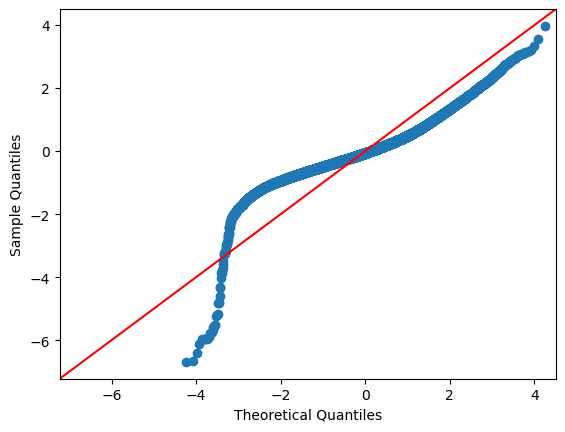

In [78]:
sm.qqplot(resid, line ='45') 
plt.show()

In [79]:
from scipy.stats import kstest
kstest(resid, 'norm')

KstestResult(statistic=0.1752372215247492, pvalue=0.0, statistic_location=-0.6624403799082457, statistic_sign=-1)

### Export Predictions

In [83]:
test = pd.read_csv('test.csv')

test = pd.get_dummies(test, columns=['Sex'], drop_first = False)

test['Log_Whole weight'] = np.log(test['Whole weight'])
test['Log_Shell weight'] = np.log(test['Shell weight'])
test['Log_Whole weight.2'] = np.log(test['Whole weight.2'])
test['Log_Whole weight.1'] = np.log(test['Whole weight.1'])
test['Log_Diameter'] = np.log(test['Diameter'])
test_New = pd.DataFrame(test[['Length', 'Height', 'Sex_F', 'Sex_I', 'Sex_M', 'Log_Whole weight',
                                'Log_Shell weight', 'Log_Whole weight.2', 'Log_Whole weight.1', 'Log_Diameter']])
test_New['Tall'] = "Not"
test_New.loc[test_New['Height'] > .4, 'Tall'] = "Yes"
test_New.loc[test_New['Height'] > .8, 'Tall'] = "Extra"
test_New = pd.get_dummies(test_New, columns=['Tall'], drop_first = False)

designTest = MS(test_New.columns).fit(test_New)
D_test = designTest.fit_transform(test_New)
D_test = D_test.drop(['Sex_I'], axis=1)

polyFeatures = PolynomialFeatures(degree=3, include_bias=False)
xPolyTest = polyFeatures.fit_transform(D_test)
xPolyTest_names = polyFeatures.get_feature_names_out(D_test.columns)
XTestnew = pd.DataFrame(xPolyTest, columns = xPolyTest_names)

XTest = MS(list(VarsFS)).fit_transform(XTestnew)

XTest.drop(['Log_Whole weight Log_Whole weight.1 Tall_Not'], axis=1, inplace=True)
XTest.drop(['Height Log_Whole weight.1'], axis=1, inplace=True)
XTest.drop(['Log_Whole weight'], axis=1, inplace=True)
XTest.drop(['Sex_M Log_Whole weight.1 Tall_Not'], axis=1, inplace=True)
XTest.drop(['Height Log_Whole weight Log_Whole weight.2'], axis=1, inplace=True)
XTest.drop(['Height'], axis=1, inplace=True)
XTest.drop(['Height Log_Whole weight'], axis=1, inplace=True)
XTest.drop(['Length^3'], axis=1, inplace=True)
XTest.drop(['Sex_F Log_Whole weight Log_Shell weight'], axis=1, inplace=True)
XTest.drop(['Log_Whole weight^2 Log_Shell weight'], axis=1, inplace=True)
XTest.drop(['Length Log_Whole weight^2'], axis=1, inplace=True)
XTest.drop(['Length^2 Sex_M'], axis=1, inplace=True)

T_Rings = results.predict(XTest)


Rings = np.round(pt.inverse_transform(T_Rings.to_numpy().reshape(-1, 1)), 0)
output = pd.DataFrame(test[['id']])
output['Rings'] = Rings
print(output['Rings'].min())
print(output)
output.to_csv('model6.csv', index = False)

1.0
           id  Rings
0       90615    9.0
1       90616   10.0
2       90617   10.0
3       90618   10.0
4       90619    8.0
...       ...    ...
60406  151021    6.0
60407  151022    9.0
60408  151023   10.0
60409  151024   13.0
60410  151025    8.0

[60411 rows x 2 columns]
